In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
import gym

In [180]:
env = gym.make("Reacher-v2")
env.reset()
env.action_space

Box(2,)

In [ ]:
data_frame = pd.read_csv('./logs/PPO/LunarLander-v2/run-2020-08-09-09-00-44-829898.csv')

In [50]:
plt.plot(data_frame.total_time, data_frame.ep_rew_mean)

NameError: name 'data_frame' is not defined

In [3]:
def get_dataframes(algorithm):
    assert algorithm in ['PPO', 'RND', 'ICM', 'ES', 'PPO_SimHash']
    log_dir = os.getcwd() + '/logs/' + algorithm
    ppo_df = pd.DataFrame()
    for file in os.listdir(log_dir):
        for index, df_file in enumerate(os.listdir(log_dir + '/' + file)):
            df = pd.read_csv(log_dir + '/' + file + '/' + df_file)
            df['t'] = df.index
            env_name = [str(file) for _ in range(len(df))]
            run = [index + 1 for _ in range(len(df))]
            df["env"] = env_name
            df["run"] = run
            try:
                df["reward"] = df["ep_rew_mean"]
                df.drop(columns = ["ep_rew_mean"])
            except KeyError:
                pass
            ppo_df = pd.concat([ppo_df, df])

    ppo_df['total_time'] = np.floor(ppo_df.total_time)
    return ppo_df
def average_out(df, env):
    return df[df["env"] == env].groupby("t").mean()

def average_all(env):
    mean_ppo = average_out(ppo_df, env)
    mean_icm = average_out(icm_df, env)
    mean_rnd = average_out(rnd_df, env)
    mean_sh = average_out(simhash_df, env)
    mean_es = average_out(es_df, env)
    return mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es


In [177]:
rnd_df[rnd_df["env"] == "InvertedPendulum-v2"]

ep_rew_mean  mean_int_reward  num_episodes  total_time  total timesteps  \
0           6.68     0.000000e+00         160.0         0.0           1024.0   
1           6.12     0.000000e+00         308.0         1.0           2048.0   
2           8.32     0.000000e+00         430.0         3.0           3072.0   
3          12.06     0.000000e+00         528.0         4.0           4096.0   
4          12.08     0.000000e+00         617.0         5.0           5120.0   
..           ...              ...           ...         ...              ...   
972       878.64     1.369937e-16        3993.0      1076.0         996352.0   
973       878.64     3.267891e-17        3994.0      1077.0         997376.0   
974       878.64     1.296174e-17        3994.0      1078.0         998400.0   
975       878.64     8.919790e-17        3996.0      1079.0         999424.0   
976       878.64     9.599214e-18        3997.0      1080.0        1000448.0   

     total_loss  entropy_loss  value_loss  intrinsic_loss  \
0           NaN           NaN         NaN             NaN   
1      2.696273     -1.402149    2.705767    1.037302e-02   
2      1.492060     -1.376126    1.504390    8.410357e-04   
3      1.484395     -1.341517    1.496430    7.590130e-04   
4      1.489599     -1.311711    1.510536    5.981686e-04   
..          ...           ...         ...             ...   
972   13.487855      0.225144   13.485297    1.702370e-10   
973    6.830029      0.227404    6.831244    3.071019e-09   
974    7.858936      0.229148    7.859338    1.882505e-10   
975    0.056715      0.234253    0.058069    5.124168e-11   
976   14.161215      0.247264   14.166291    4.057202e-10   

     policy_gradient_loss    t                  env  run  reward  
0                     NaN    0  InvertedPendulum-v2    1    6.68  
1               -0.014681    1  InvertedPendulum-v2    1    6.12  
2               -0.012750    2  InvertedPendulum-v2    1    8.32  
3               -0.012415    3  InvertedPendulum-v2    1   12.06  
4               -0.021236    4  InvertedPendulum-v2    1   12.08  
..                    ...  ...                  ...  ...     ...  
972              0.002557  972  InvertedPendulum-v2   10  878.64  
973             -0.001215  973  InvertedPendulum-v2   10  878.64  
974             -0.000402  974  InvertedPendulum-v2   10  878.64  
975             -0.001354  975  InvertedPendulum-v2   10  878.64  
976             -0.005076  976  InvertedPendulum-v2   10  878.64  

[6422 rows x 14 columns]

In [218]:
ppo_df = get_dataframes("PPO")
icm_df = get_dataframes("ICM")
rnd_df = get_dataframes("RND")
simhash_df = get_dataframes("PPO_SimHash")
es_df = get_dataframes("ES")

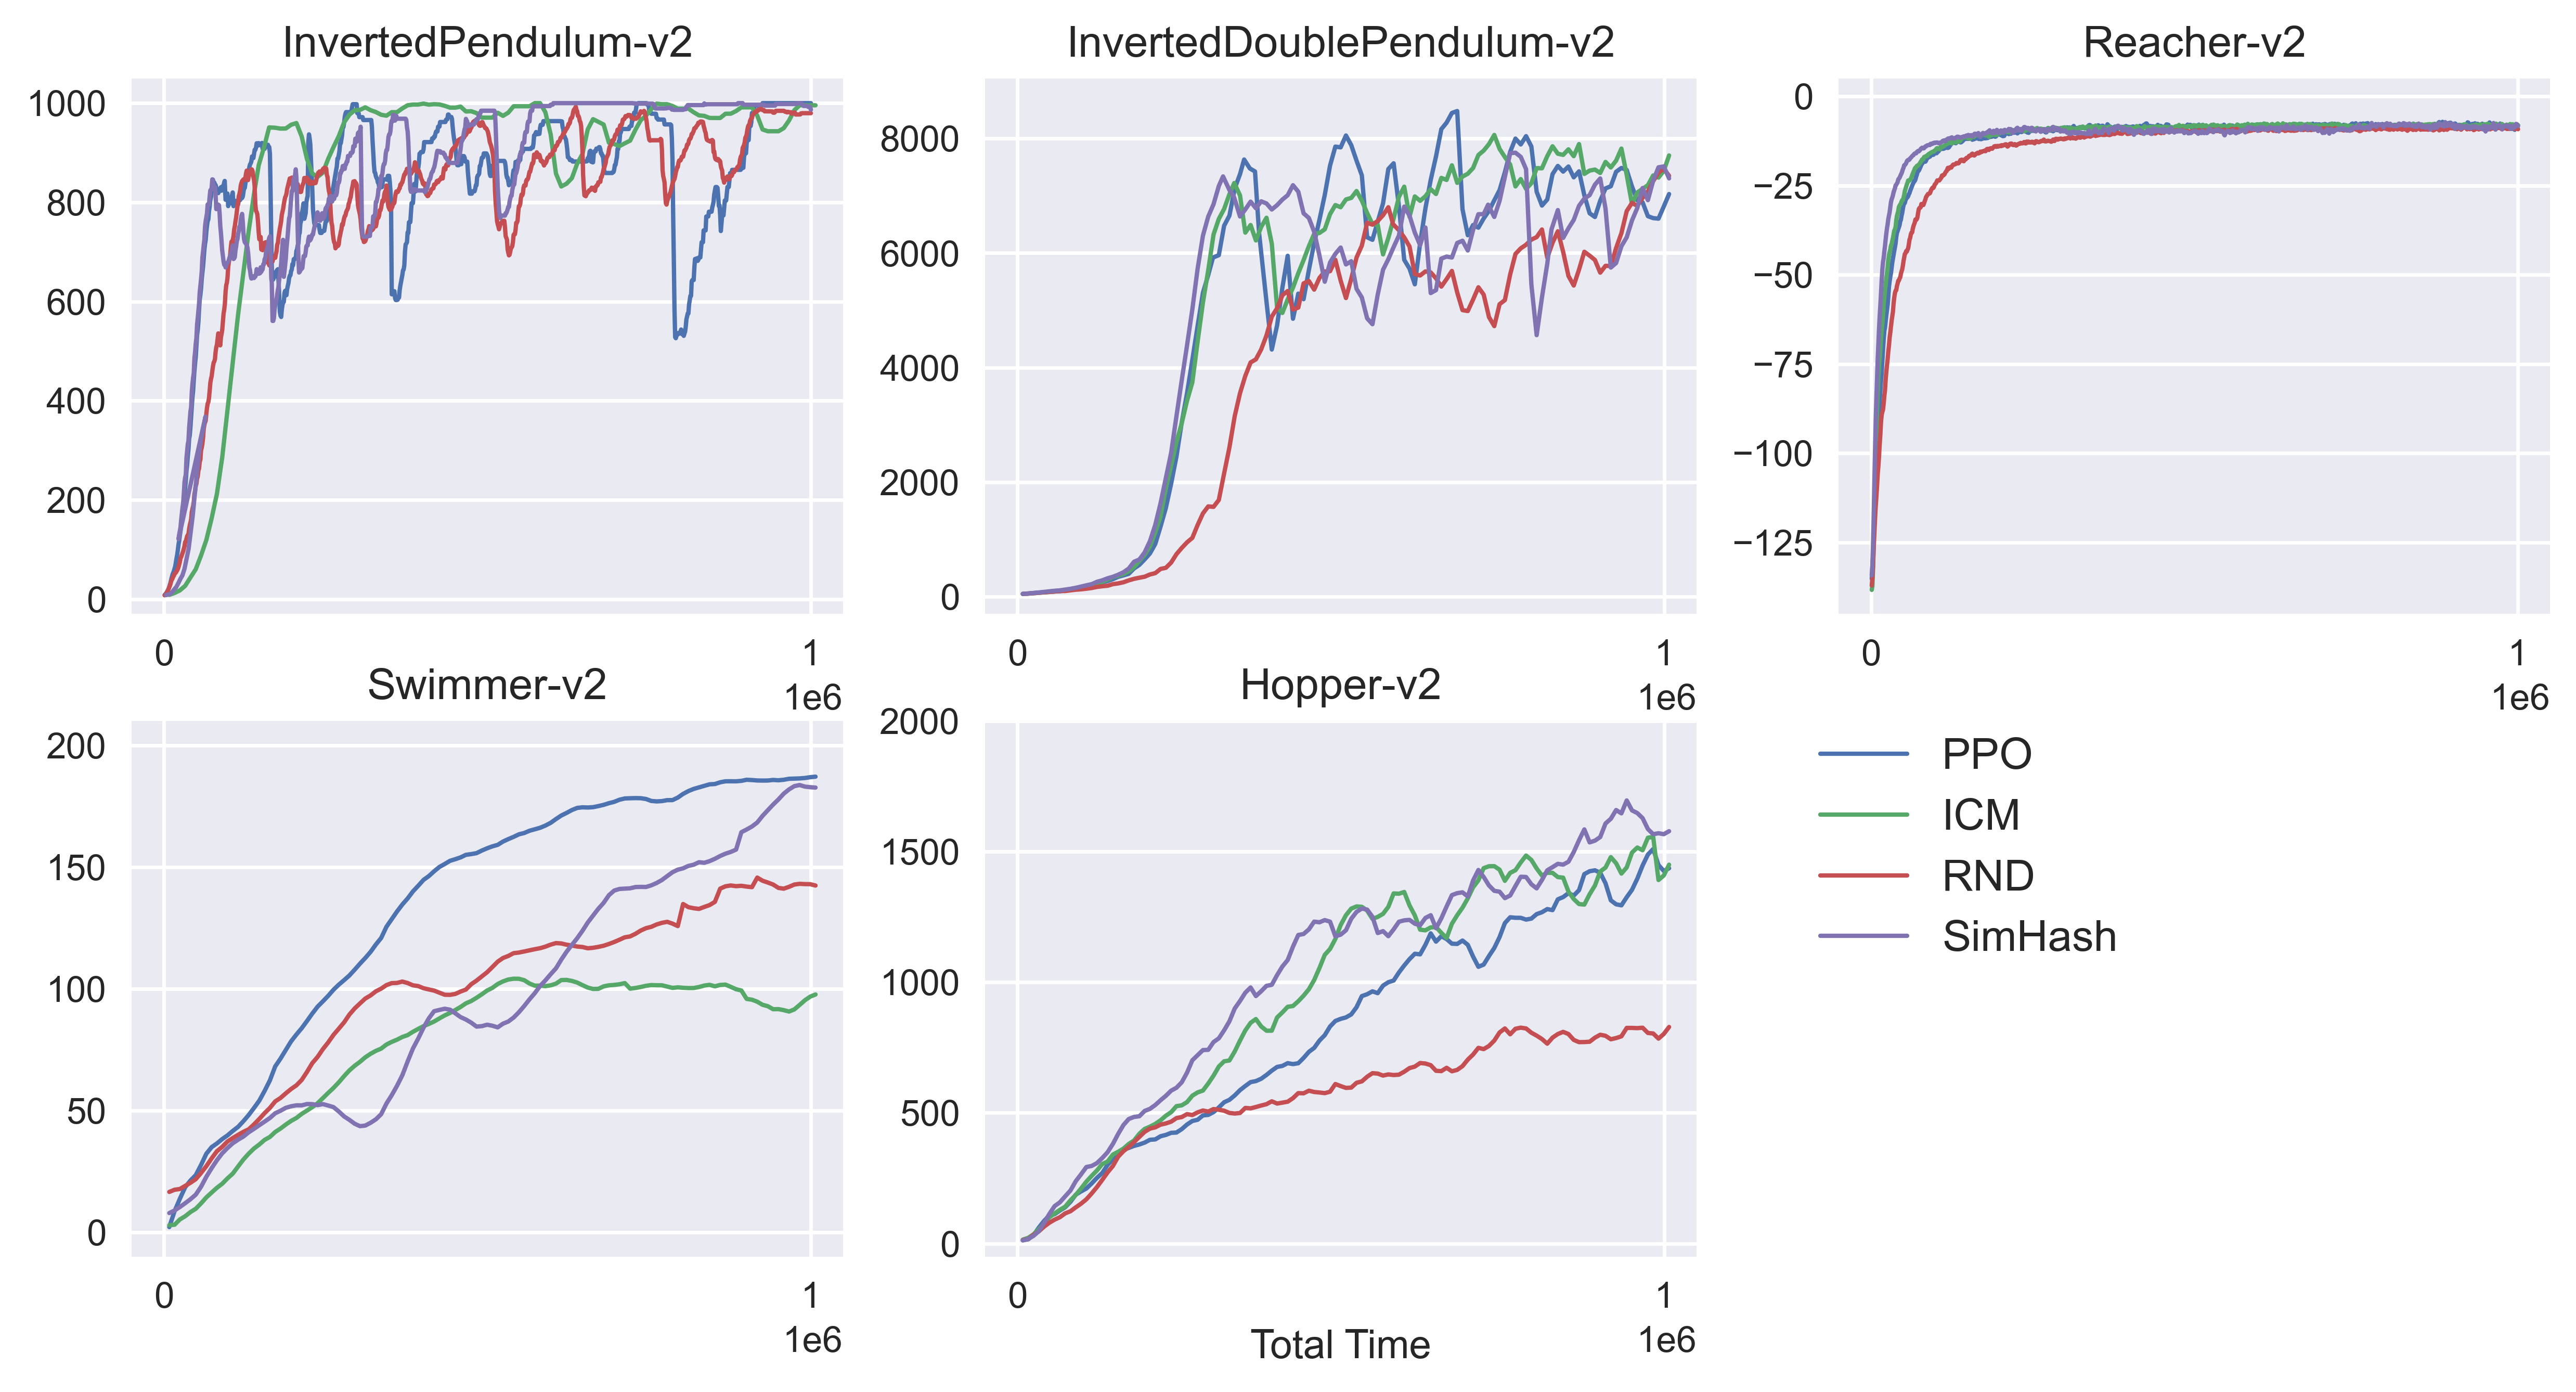

In [17]:

plt.rcParams['figure.dpi']= 500
plt.style.use('seaborn')
fig, ax = plt.subplots(2,3, figsize = (12, 6))
fig.delaxes(ax[1,2])

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("InvertedPendulum-v2")

ax[0][0].plot(mean_ppo["total timesteps"], mean_ppo["reward"], label = "PPO", linewidth=1.2)
ax[0][0].plot(mean_icm["total timesteps"], mean_icm["reward"], label = "ICM", linewidth=1.2)
ax[0][0].plot(mean_rnd["total timesteps"], mean_rnd["reward"], label = "RND", linewidth=1.2)
ax[0][0].plot(mean_sh["total timesteps"], mean_sh["reward"], label = "SimHash", linewidth=1.2)
ax[0][0].set_title('InvertedPendulum-v2')
ax[0][0].set_ylim(-30, 1050)

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("InvertedDoublePendulum-v2")

ax[0][1].plot(mean_ppo["total timesteps"], mean_ppo["reward"], label = "PPO", linewidth=1.2)
ax[0][1].plot(mean_icm["total timesteps"], mean_icm["reward"], label = "ICM", linewidth=1.2)
ax[0][1].plot(mean_rnd["total timesteps"], mean_rnd["reward"], label = "RND", linewidth=1.2)
ax[0][1].plot(mean_sh["total timesteps"], mean_sh["reward"], label = "SimHash", linewidth=1.2)
ax[0][1].set_title('InvertedDoublePendulum-v2')
ax[0][1].set_ylim(-300, 9050)

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Reacher-v2")

ax[0][2].plot(mean_ppo["total timesteps"], mean_ppo["reward"], label = "PPO", linewidth=1.2)
ax[0][2].plot(mean_icm["total timesteps"], mean_icm["reward"], label = "ICM", linewidth=1.2)
ax[0][2].plot(mean_rnd["total timesteps"], mean_rnd["reward"], label = "RND", linewidth=1.2)
ax[0][2].plot(mean_sh["total timesteps"], mean_sh["reward"], label = "SimHash", linewidth=1.2)
ax[0][2].set_title('Reacher-v2')
ax[0][2].set_ylim(-145, 5)

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Swimmer-v2")

ax[1][0].plot(mean_ppo["total timesteps"], mean_ppo["reward"], label = "PPO", linewidth=1.2)
ax[1][0].plot(mean_icm["total timesteps"], mean_icm["reward"], label = "ICM", linewidth=1.2)
ax[1][0].plot(mean_rnd["total timesteps"], mean_rnd["reward"], label = "RND", linewidth=1.2)
ax[1][0].plot(mean_sh["total timesteps"], mean_sh["reward"], label = "SimHash", linewidth=1.2)
ax[1][0].set_title('Swimmer-v2')
ax[1][0].set_ylim(-10, 210)

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Hopper-v2")

ax[1][1].plot(mean_ppo["total timesteps"], mean_ppo["reward"], label = "PPO", linewidth=1.2)
ax[1][1].plot(mean_icm["total timesteps"], mean_icm["reward"], label = "ICM", linewidth=1.2)
ax[1][1].plot(mean_rnd["total timesteps"], mean_rnd["reward"], label = "RND", linewidth=1.2)
ax[1][1].plot(mean_sh["total timesteps"], mean_sh["reward"], label = "SimHash", linewidth=1.2)
ax[1][1].set_title('Hopper-v2')
ax[1][1].set_ylim(-50, 2000)

plt.xlabel("Total Time")

plt.setp(ax, xticks=[0, 1e+6], xlim=[-0.5e+5, 1.05e+6])
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0., fontsize = "large")
plt.savefig("timestep_comparison.eps", format='eps')

In [18]:
def get_earliest(df, column, target, value):
    return df[df[column] > value].iloc[0][target]

In [19]:
environments = ["InvertedPendulum-v2", "InvertedDoublePendulum-v2", "Reacher-v2", "Swimmer-v2", "Hopper-v2"]
average = 0
for i, env in enumerate(environments):
    mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all(env)
    average += get_earliest(mean_ppo, "total timesteps", "total_time", 1e+6)
average/len(environments)

1123.747272727273

In [51]:
run_times = pd.DataFrame()
columns = ["PPO", "PPO_SimHash", "PPO_ICM", "PPO_RND", "ES"]
def extract_times(df, env):
    assert env in ["InvertedPendulum-v2", "InvertedDoublePendulum-v2", "Reacher-v2", "Swimmer-v2", "Hopper-v2"]
    arr = []
    for i in np.unique(df[(df["env"] == env)].run):
        try:
            arr.append(get_earliest(df[(df["env"] == env) & (df["run"] == i)], "reward", "total_time", 1000))
        except:
            pass
    return arr

dataframes = [ppo_df, simhash_df, icm_df, rnd_df, es_df]
for column, df in zip(columns, dataframes):
    c = extract_times(df, "Hopper-v2")
    df1 = pd.DataFrame({column:c})
    run_times = pd.concat([run_times, df1], axis=1)

In [21]:
long_format = pd.melt(run_times).dropna()
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(endog=long_format['value'], groups=long_format['variable'], alpha=0.05)
print(m_comp)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1    group2    meandiff p-adj    lower     upper   reject
---------------------------------------------------------------
     ES         PPO     413.0 0.1056  -54.2847  880.2847  False
     ES     PPO_ICM  674.1818 0.0016  206.8971 1141.4666   True
     ES     PPO_RND     671.5 0.0088  128.3878 1214.6122   True
     ES PPO_SimHash     227.2 0.6384 -249.8209  704.2209  False
    PPO     PPO_ICM  261.1818 0.4247 -167.6281  689.9917  False
    PPO     PPO_RND     258.5 0.5908 -251.8858  768.8858  False
    PPO PPO_SimHash    -185.8 0.7227 -625.1994  253.5994  False
PPO_ICM     PPO_RND   -2.6818    0.9 -513.0677   507.704  False
PPO_ICM PPO_SimHash -446.9818 0.0445 -886.3812   -7.5824   True
PPO_RND PPO_SimHash    -444.3  0.125 -963.6146   75.0146  False
---------------------------------------------------------------


In [28]:
def anova(run_times):
    return stats.kruskal(run_times["PPO"][np.isnan(run_times["PPO"]) == False], 
                           run_times["ES"][np.isnan(run_times["ES"]) == False],
                         run_times["PPO_SimHash"][np.isnan(run_times["PPO_SimHash"]) == False],
                         run_times["PPO_ICM"][np.isnan(run_times["PPO_ICM"]) == False],
                         run_times["PPO_RND"][np.isnan(run_times["PPO_RND"]) == False])
anova(run_times)

KruskalResult(statistic=22.284704932373312, pvalue=0.0001758897954570263)

In [27]:
from scipy.stats import stats

In [48]:
def get_quickest():
    df = pd.DataFrame()
    index = ["PPO", "ICM", "RND", "SH", "ES"]
    envs = ["InvertedPendulum-v2", "InvertedDoublePendulum-v2", "Reacher-v2", "Swimmer-v2", "Hopper-v2"] 
    targets = [900, 7000, -20, 100, 800]
    for i, env in enumerate(envs):
        mean_df = average_all(env)
        c = []
        for m_df in mean_df:          
            try:
                c.append(get_earliest(m_df, "reward", "total_time", targets[i]))
            except:
                c.append(np.inf)
                pass
        df1 = pd.DataFrame({envs[i]:c})
        df1.index = index   
        df = pd.concat([df, df1], axis = 1)
    return df

comparison_df = get_quickest()
comparison_rank = comparison_df.rank()
comparison_rank = comparison_rank.replace(np.nan, 5)

In [50]:
comparison_rank["Overall"] = comparison_rank[list(comparison_rank.columns)].mean(axis=1)
comparison_rank

InvertedPendulum-v2  InvertedDoublePendulum-v2  Reacher-v2  Swimmer-v2  \
PPO                  2.0                        2.0         3.0         2.0   
ICM                  4.0                        3.0         4.0         5.0   
RND                  5.0                        4.0         5.0         3.0   
SH                   3.0                        1.0         1.0         4.0   
ES                   1.0                        5.0         2.0         1.0   

     Hopper-v2  Overall  
PPO        3.0    2.400  
ICM        4.0    4.000  
RND        5.0    4.400  
SH         2.0    2.200  
ES         1.0    1.875

In [53]:
comparison_df

InvertedPendulum-v2  InvertedDoublePendulum-v2  Reacher-v2  Swimmer-v2  \
PPO           105.000000                 407.222222   59.500000       344.3   
ICM           283.625000                 615.909091   77.200000       985.6   
RND           499.833333                1883.666667  138.636364       599.2   
SH            229.000000                 388.300000   40.600000       735.1   
ES             96.000000                        inf   51.583333       109.5   

       Hopper-v2  
PPO   583.545455  
ICM   691.454545  
RND  1598.583333  
SH    422.400000  
ES    307.750000

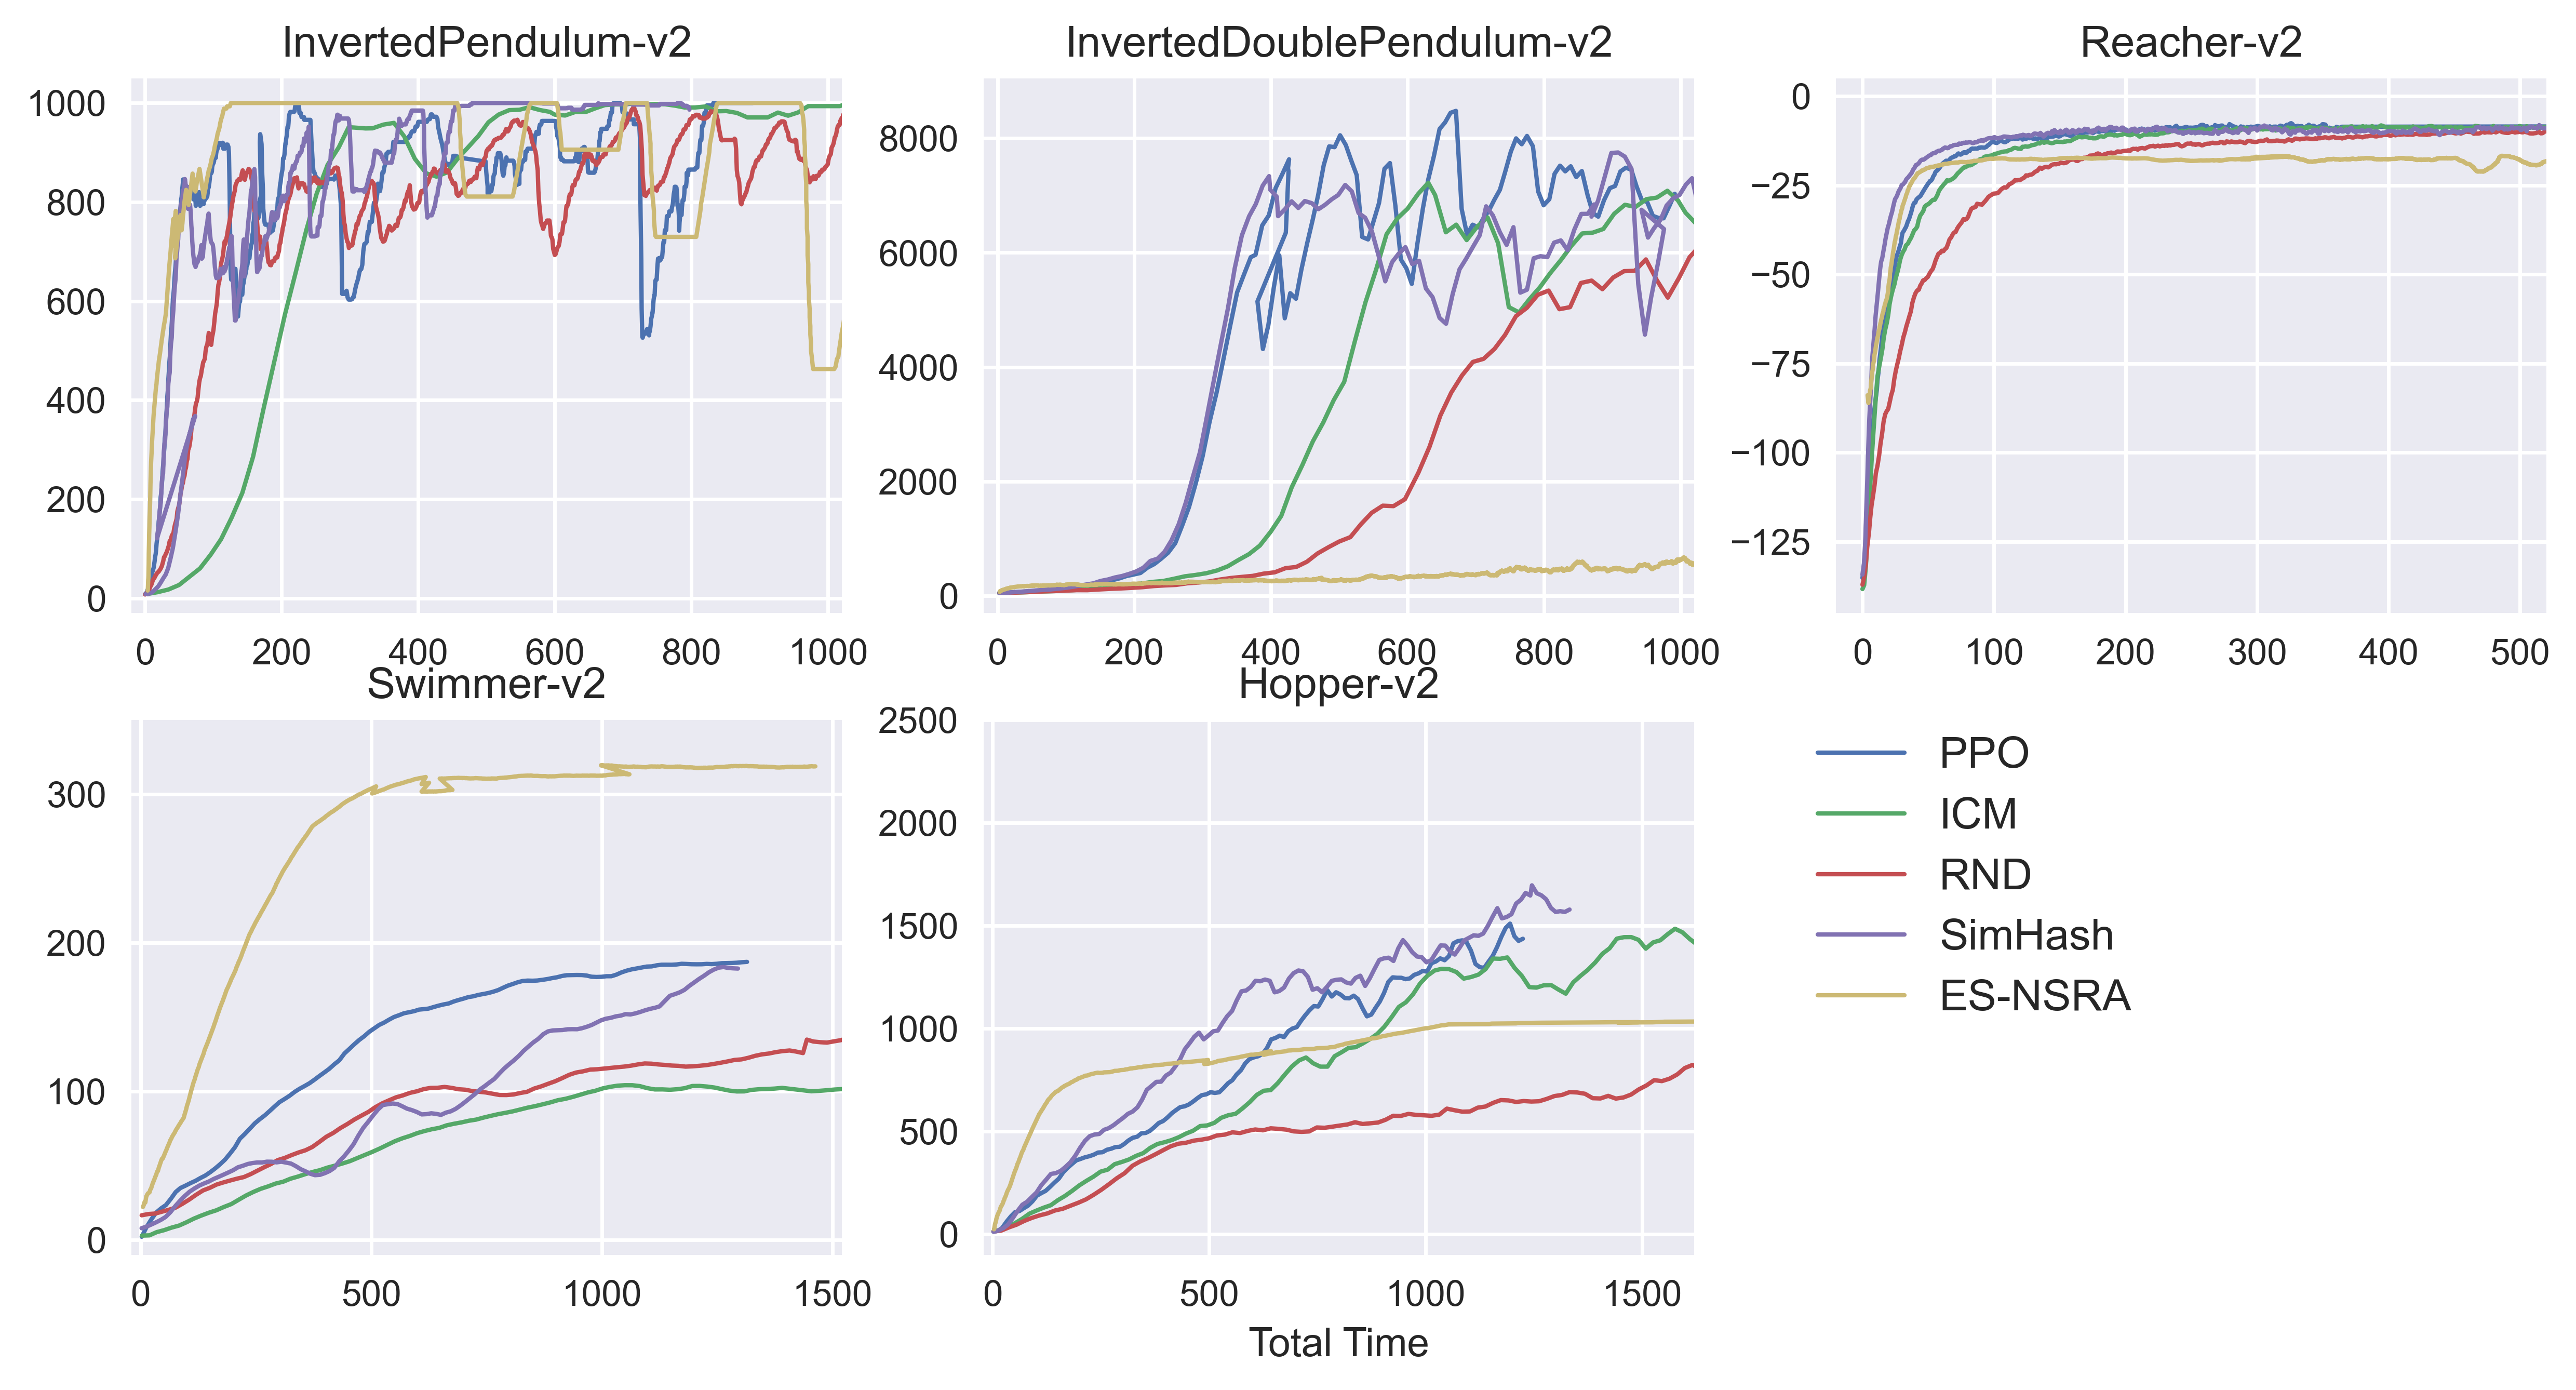

In [204]:

plt.rcParams['figure.dpi']= 500
plt.style.use('seaborn')
fig, ax = plt.subplots(2,3, figsize = (12,6))
fig.delaxes(ax[1,2])

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("InvertedPendulum-v2")

ax[0][0].plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1.2)
ax[0][0].plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1.2)
ax[0][0].plot(mean_rnd["total_time"], mean_rnd["reward"], label = "RND", linewidth=1.2)
ax[0][0].plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1.2)
ax[0][0].plot(mean_es["total_time"], mean_es["reward"], label = "ES-NSRA", linewidth=1.2)
ax[0][0].set_title('InvertedPendulum-v2')
ax[0][0].set_xlim(-20, 1020)
ax[0][0].set_ylim(-30, 1050)

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("InvertedDoublePendulum-v2")

ax[0][1].plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1.2)
ax[0][1].plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1.2)
ax[0][1].plot(mean_rnd["total_time"], mean_rnd["reward"], label = "RND", linewidth=1.2)
ax[0][1].plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1.2)
ax[0][1].plot(mean_es["total_time"], mean_es["reward"], label = "ES-NSRA", linewidth=1.2)
ax[0][1].set_title('InvertedDoublePendulum-v2')
ax[0][1].set_xlim(-20, 1020)
ax[0][1].set_ylim(-300, 9050)

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Reacher-v2")

ax[0][2].plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1.2)
ax[0][2].plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1.2)
ax[0][2].plot(mean_rnd["total_time"], mean_rnd["reward"], label = "RND", linewidth=1.2)
ax[0][2].plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1.2)
ax[0][2].plot(mean_es["total_time"], mean_es["reward"], label = "ES-NSRA", linewidth=1.2)
ax[0][2].set_title('Reacher-v2')
ax[0][2].set_xlim(-20, 520)
ax[0][2].set_ylim(-145, 5)

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Swimmer-v2")

ax[1][0].plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1.2)
ax[1][0].plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1.2)
ax[1][0].plot(mean_rnd["total_time"], mean_rnd["reward"], label = "RND", linewidth=1.2)
ax[1][0].plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1.2)
ax[1][0].plot(mean_es["total_time"], mean_es["reward"], label = "ES-NSRA", linewidth=1.2)
ax[1][0].set_xlim(-20, 1520)
ax[1][0].set_ylim(-10, 350)
ax[1][0].set_title('Swimmer-v2')

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Hopper-v2")

ax[1][1].plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1.2)
ax[1][1].plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1.2)
ax[1][1].plot(mean_rnd["total_time"], mean_rnd["reward"], label = "RND", linewidth=1.2)
ax[1][1].plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1.2)
ax[1][1].plot(mean_es["total_time"], mean_es["reward"], label = "ES-NSRA", linewidth=1.2)
ax[1][1].set_xlim(-20, 1620)
ax[1][1].set_ylim(-100, 2500)
ax[1][1].set_title('Hopper-v2')

plt.xlabel("Total Time")

plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0., fontsize = "large")
plt.savefig("time_comparison.eps", format='eps')

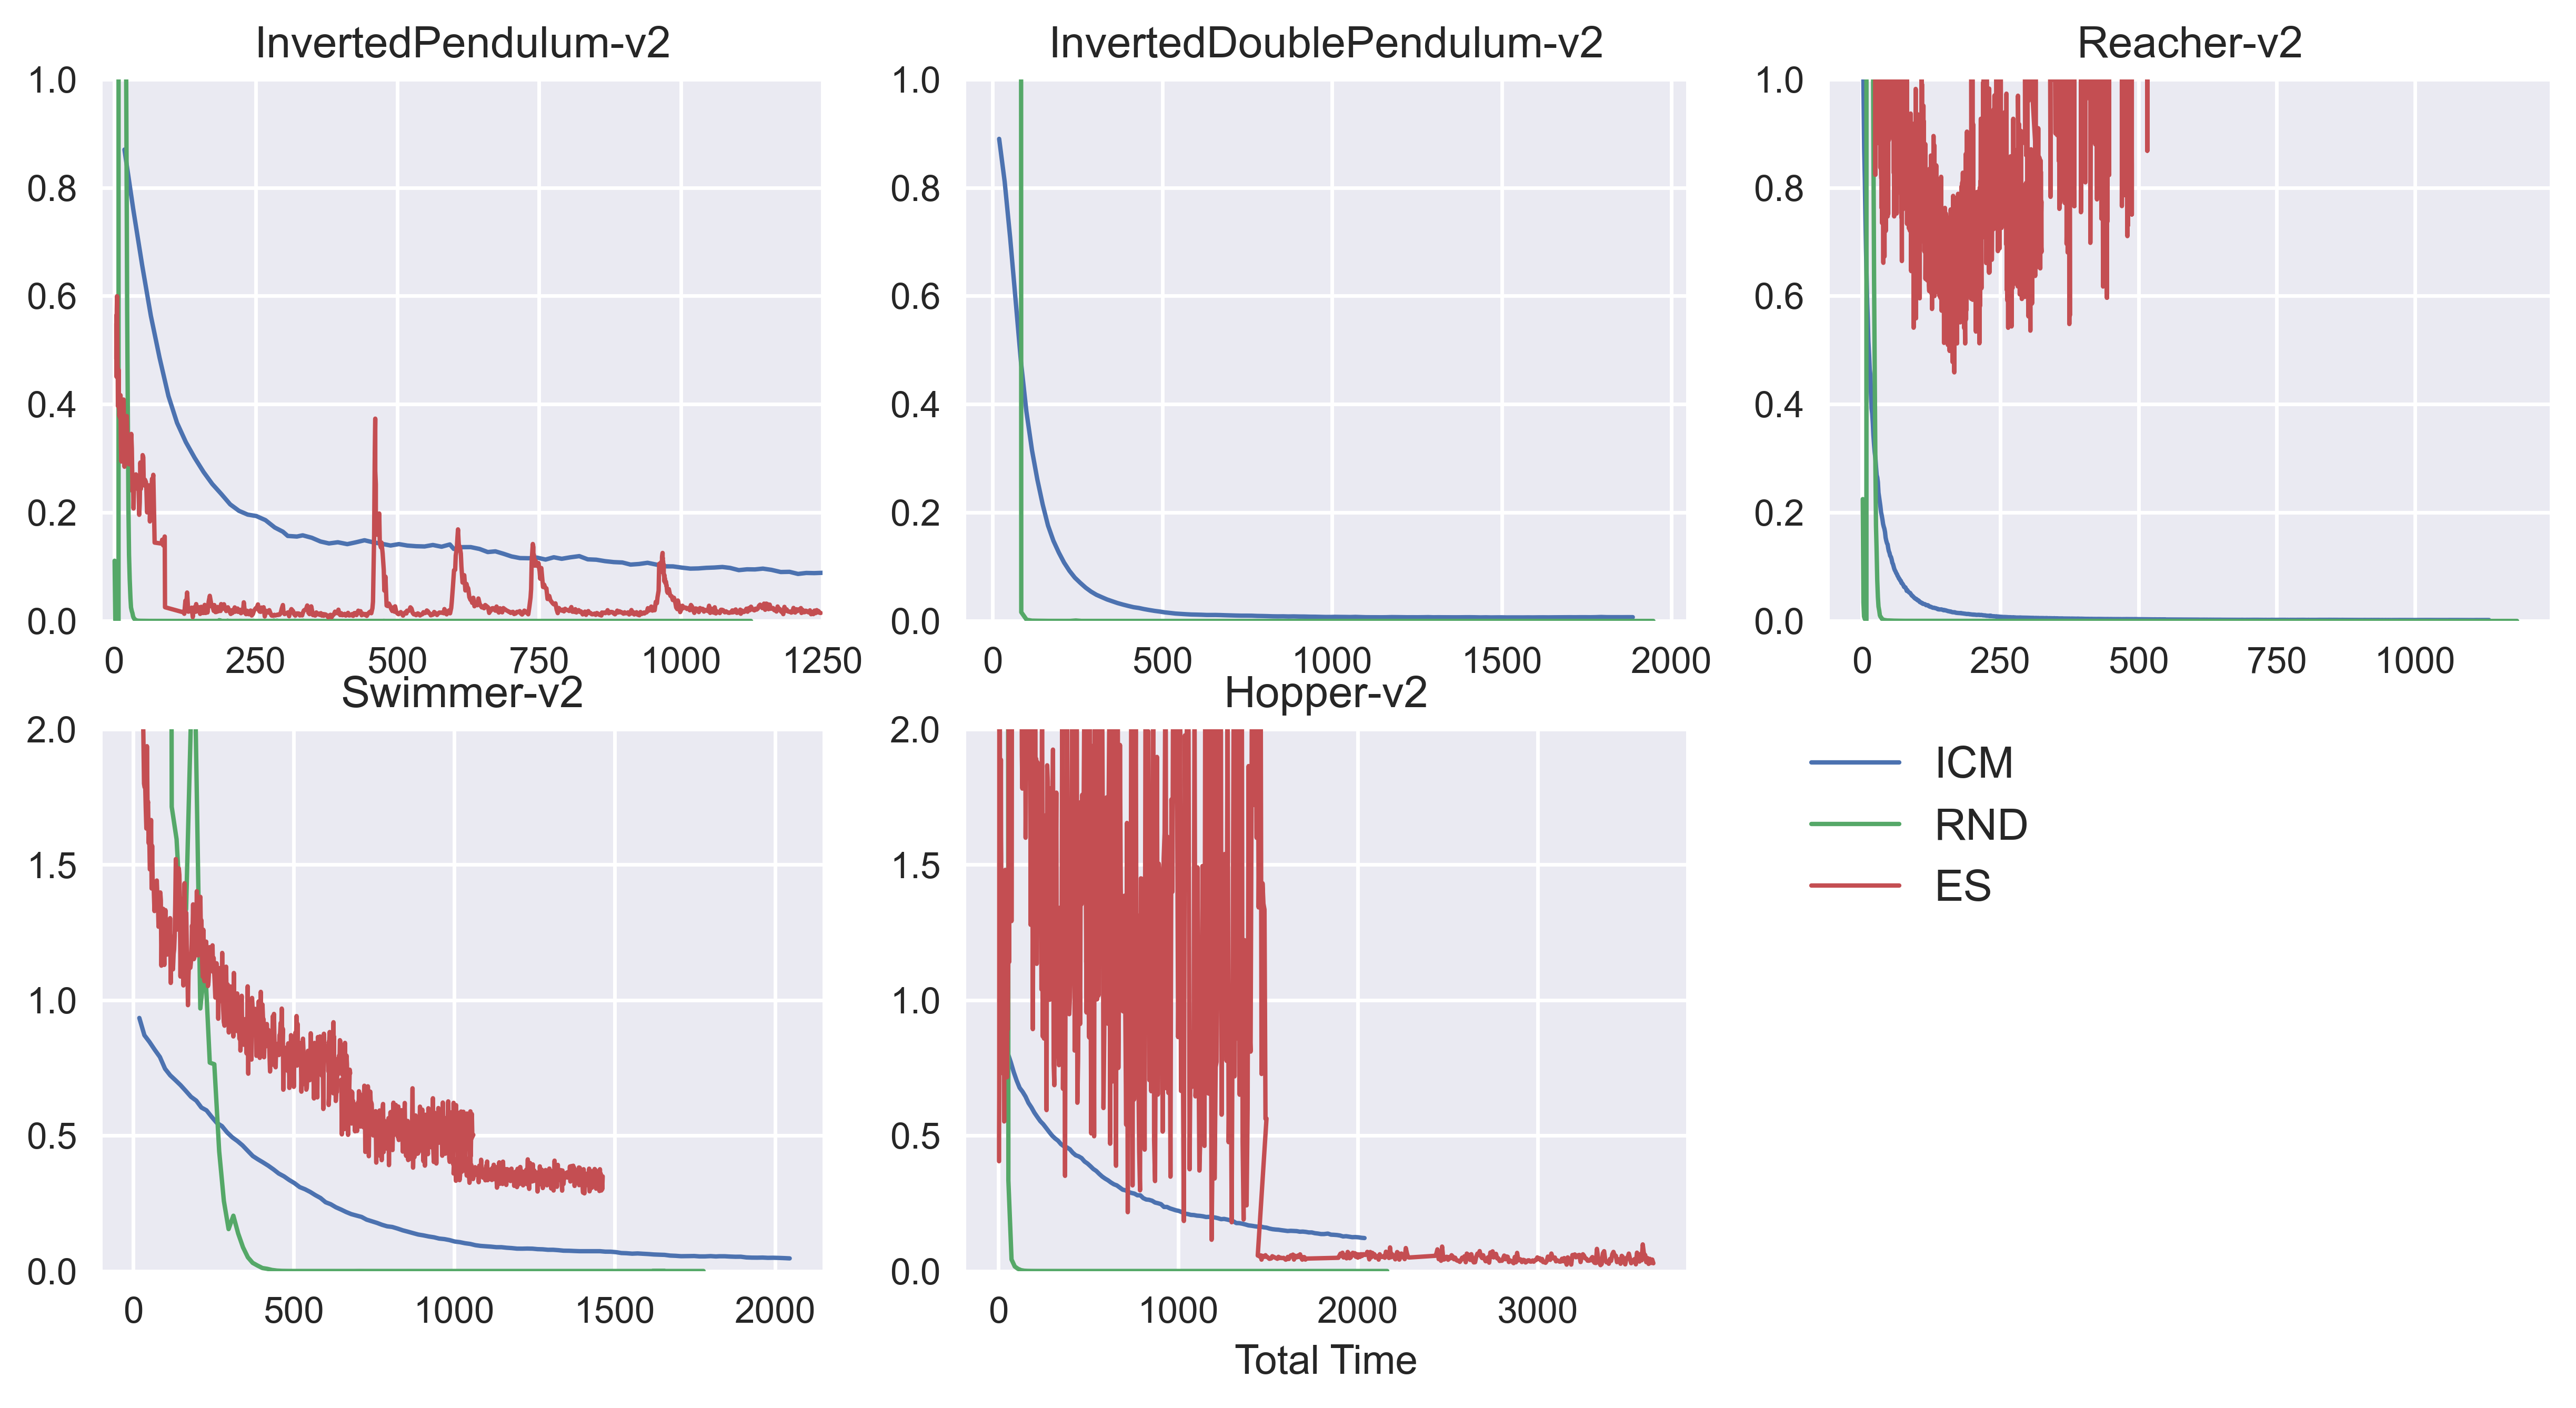

In [99]:
plt.rcParams['figure.dpi']= 500
plt.style.use('seaborn')
fig, ax = plt.subplots(2,3, figsize = (12,6))
fig.delaxes(ax[1,2])

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("InvertedPendulum-v2")
mean_icm["novelty"] = mean_icm["icm_loss"]
mean_rnd["novelty"] = mean_rnd["intrinsic_loss"]



ax[0][0].plot(mean_icm["total_time"], mean_icm["novelty"], label = "ICM", linewidth=1.2)
ax[0][0].plot(mean_rnd["total_time"], mean_rnd["novelty"], label = "PPO", linewidth=1.2)
ax[0][0].plot(mean_es["total_time"], mean_es["novelty"], label = "ES", linewidth=1.2)
ax[0][0].set_title('InvertedPendulum-v2')
ax[0][0].set_ylim(0, 1)
ax[0][0].set_xlim(-20, 1250)

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("InvertedDoublePendulum-v2")
mean_icm["novelty"] = mean_icm["icm_loss"]
mean_rnd["novelty"] = mean_rnd["intrinsic_loss"]


ax[0][1].plot(mean_icm["total_time"], mean_icm["novelty"], label = "ICM", linewidth=1.2)
ax[0][1].plot(mean_rnd["total_time"], mean_rnd["novelty"], label = "RND", linewidth=1.2)
ax[0][1].set_title('InvertedDoublePendulum-v2')
ax[0][1].set_ylim(0, 1)

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Reacher-v2")
mean_icm["novelty"] = mean_icm["icm_loss"]
mean_rnd["novelty"] = mean_rnd["intrinsic_loss"]

ax[0][2].plot(mean_icm["total_time"], mean_icm["novelty"], label = "ICM", linewidth=1.2)
ax[0][2].plot(mean_rnd["total_time"], mean_rnd["novelty"], label = "RND", linewidth=1.2)
ax[0][2].plot(mean_es["total_time"], mean_es["novelty"], label = "ES", linewidth=1.2)
ax[0][2].set_title('Reacher-v2')
ax[0][2].set_ylim(0, 1)


mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Swimmer-v2")
mean_icm["novelty"] = mean_icm["icm_loss"]
mean_rnd["novelty"] = mean_rnd["intrinsic_loss"]

ax[1][0].plot(mean_icm["total_time"], mean_icm["novelty"], label = "ICM", linewidth=1.2)
ax[1][0].plot(mean_rnd["total_time"], mean_rnd["novelty"], label = "RND", linewidth=1.2)
ax[1][0].plot(mean_es["total_time"], mean_es["novelty"], label = "ES", linewidth=1.2)
ax[1][0].set_title('Swimmer-v2')
ax[1][0].set_ylim(0, 2)

mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Hopper-v2")
mean_icm["novelty"] = mean_icm["icm_loss"]
mean_rnd["novelty"] = mean_rnd["intrinsic_loss"]

ax[1][1].plot(mean_icm["total_time"], mean_icm["novelty"], label = "ICM", linewidth=1.2)
ax[1][1].plot(mean_rnd["total_time"], mean_rnd["novelty"], label = "RND", linewidth=1.2)
ax[1][1].plot(mean_es["total_time"], mean_es["novelty"], label = "ES", linewidth=1.2)
ax[1][1].set_title('Hopper-v2')
ax[1][1].set_ylim(0, 2)

plt.xlabel("Total Time")

plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0., fontsize = "large")
plt.savefig("time_comparison.eps", format='eps')

In [194]:
def keep_below_target(df, target):
    return df[: df[df["reward"] > target].index[0+1]]



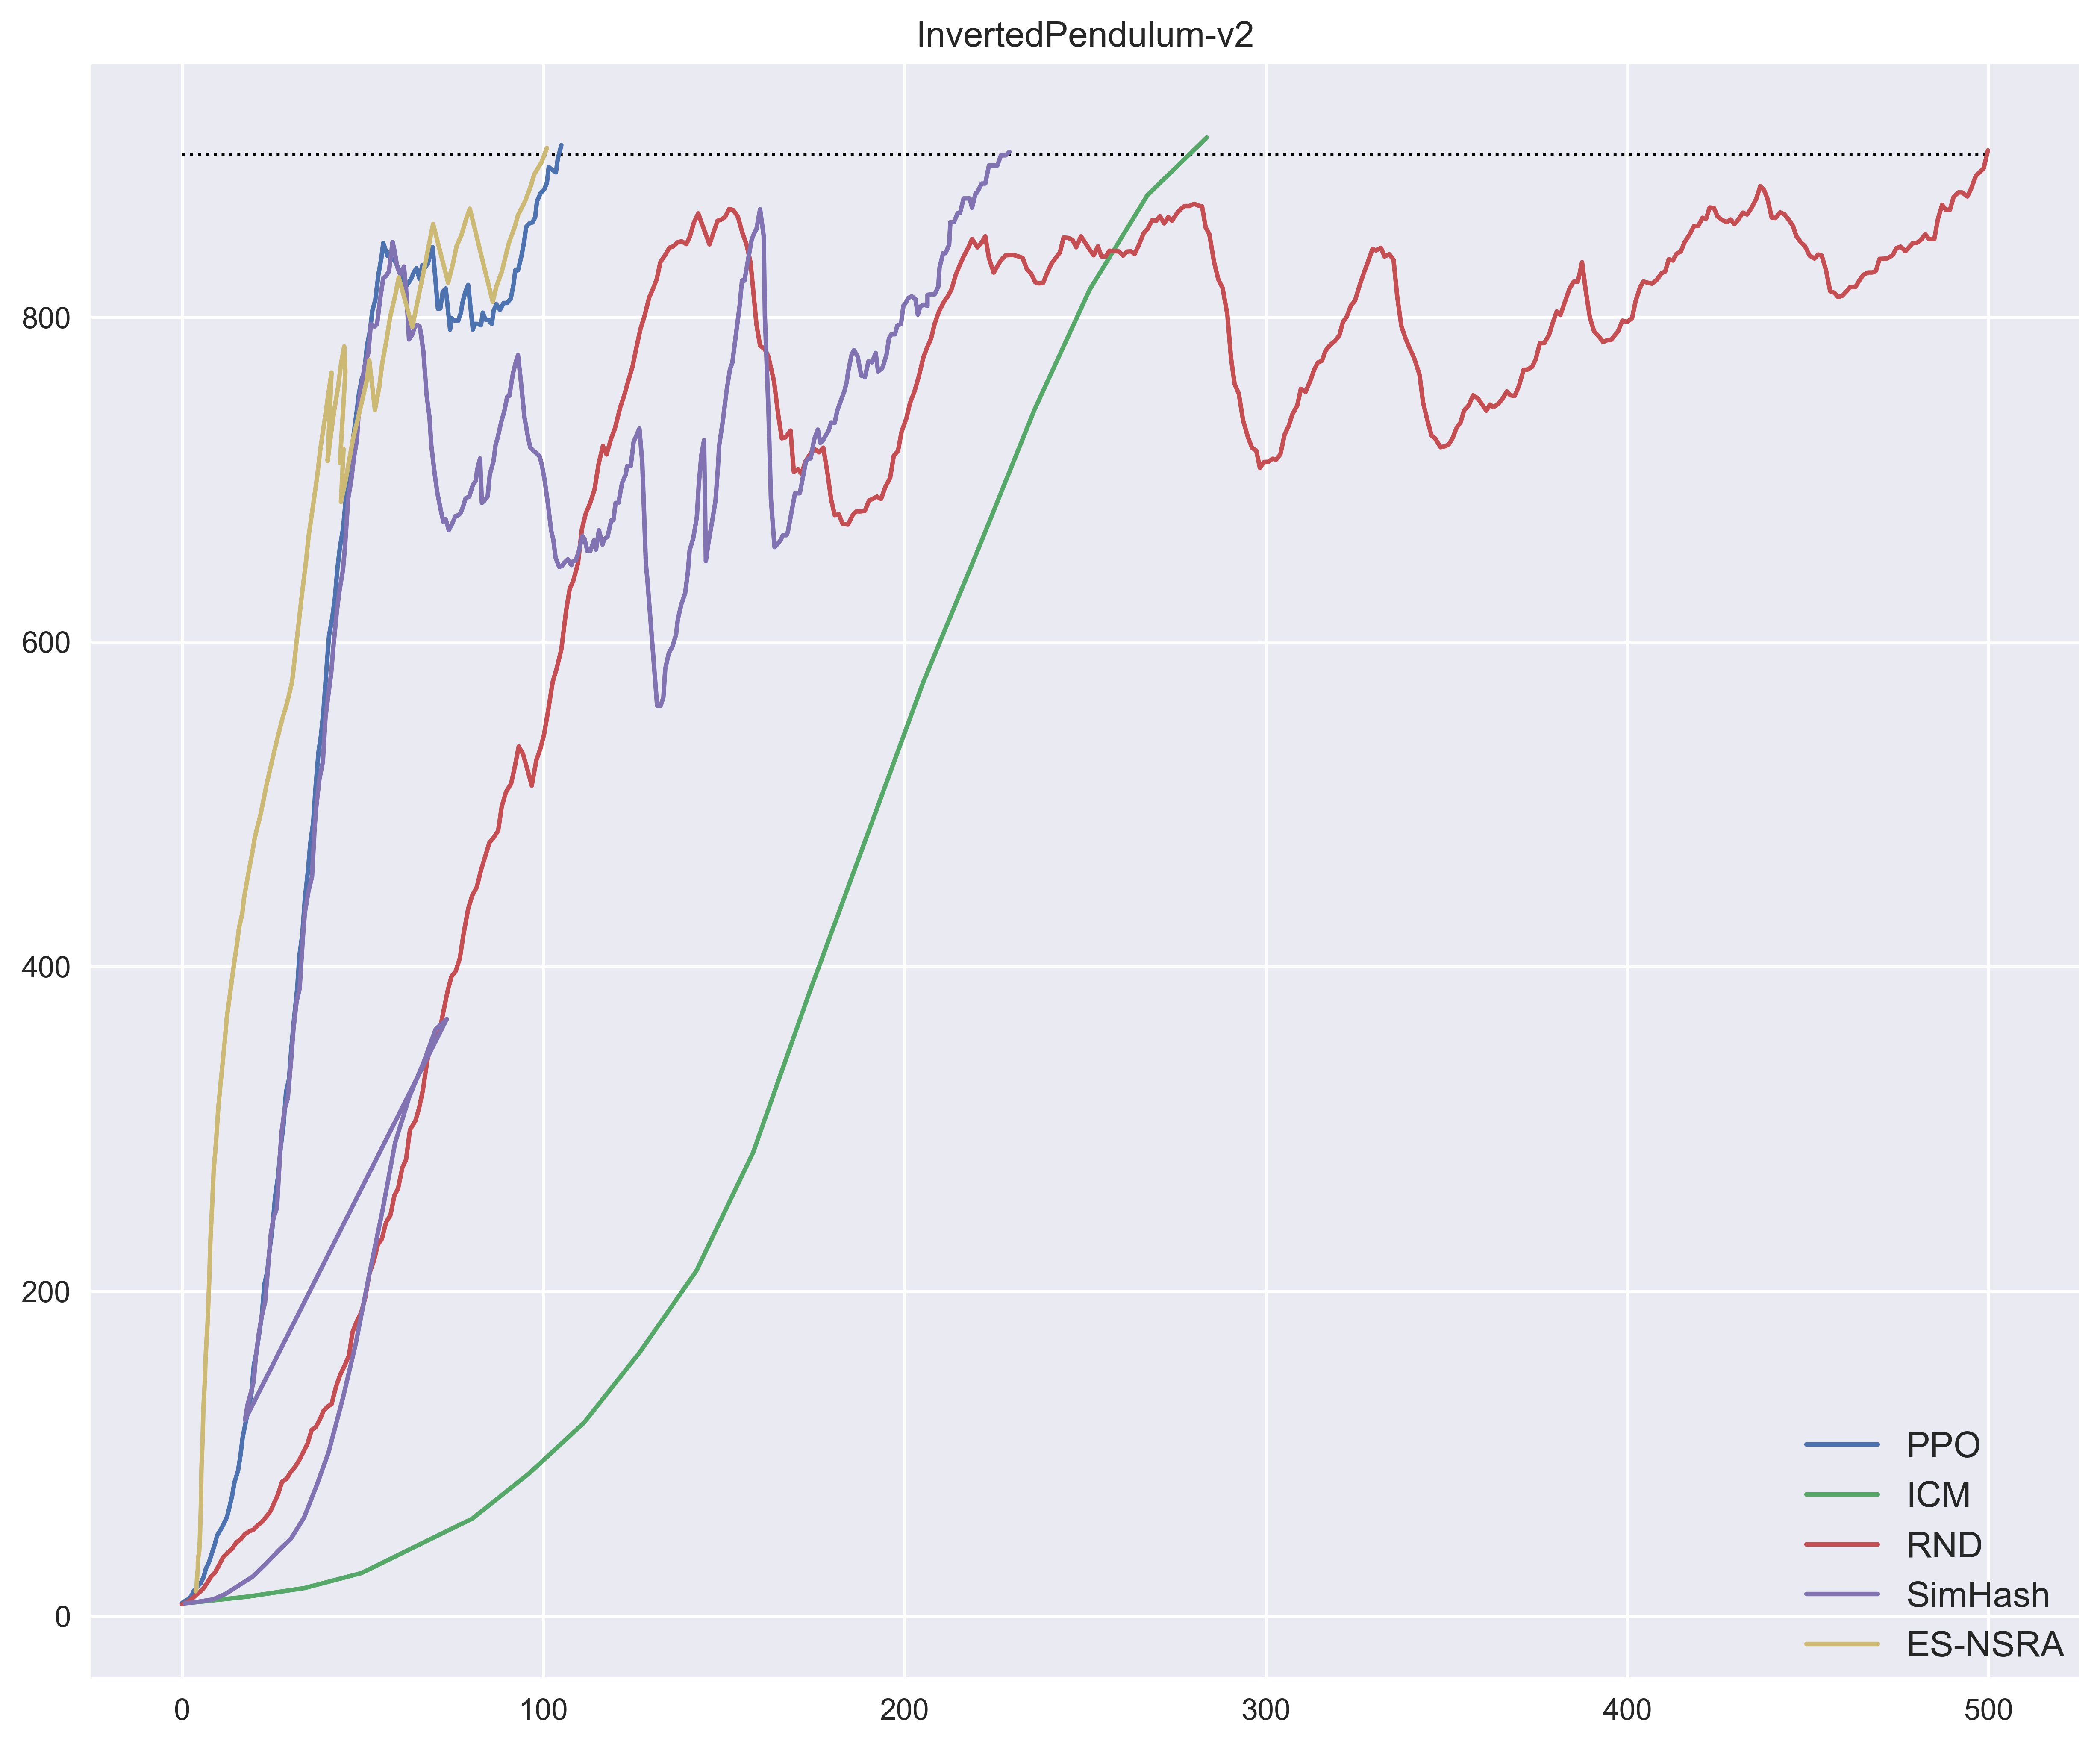

In [236]:
mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("InvertedPendulum-v2")

mean_ppo = keep_below_target(mean_ppo, 900)
mean_icm = keep_below_target(mean_icm, 900)
mean_rnd = keep_below_target(mean_rnd, 900)
mean_sh = keep_below_target(mean_sh, 900)
mean_es = keep_below_target(mean_es, 900)

plt.rcParams['figure.dpi']= 500
plt.style.use('seaborn')
plt.figure(figsize=(6, 5))


plt.plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1.5)
plt.plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1.5)
plt.plot(mean_rnd["total_time"], mean_rnd["reward"], label = "RND", linewidth=1.5)
plt.plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1.5)
plt.plot(mean_es["total_time"], mean_es["reward"], label = "ES-NSRA", linewidth=1.5)
plt.legend(loc='lower right', borderaxespad=0., fontsize = "large")
plt.hlines(900, 0, 500, linestyles='dotted', linewidth=1)
plt.title("InvertedPendulum-v2")
plt.savefig("InvertedPendulum.eps", format='eps')

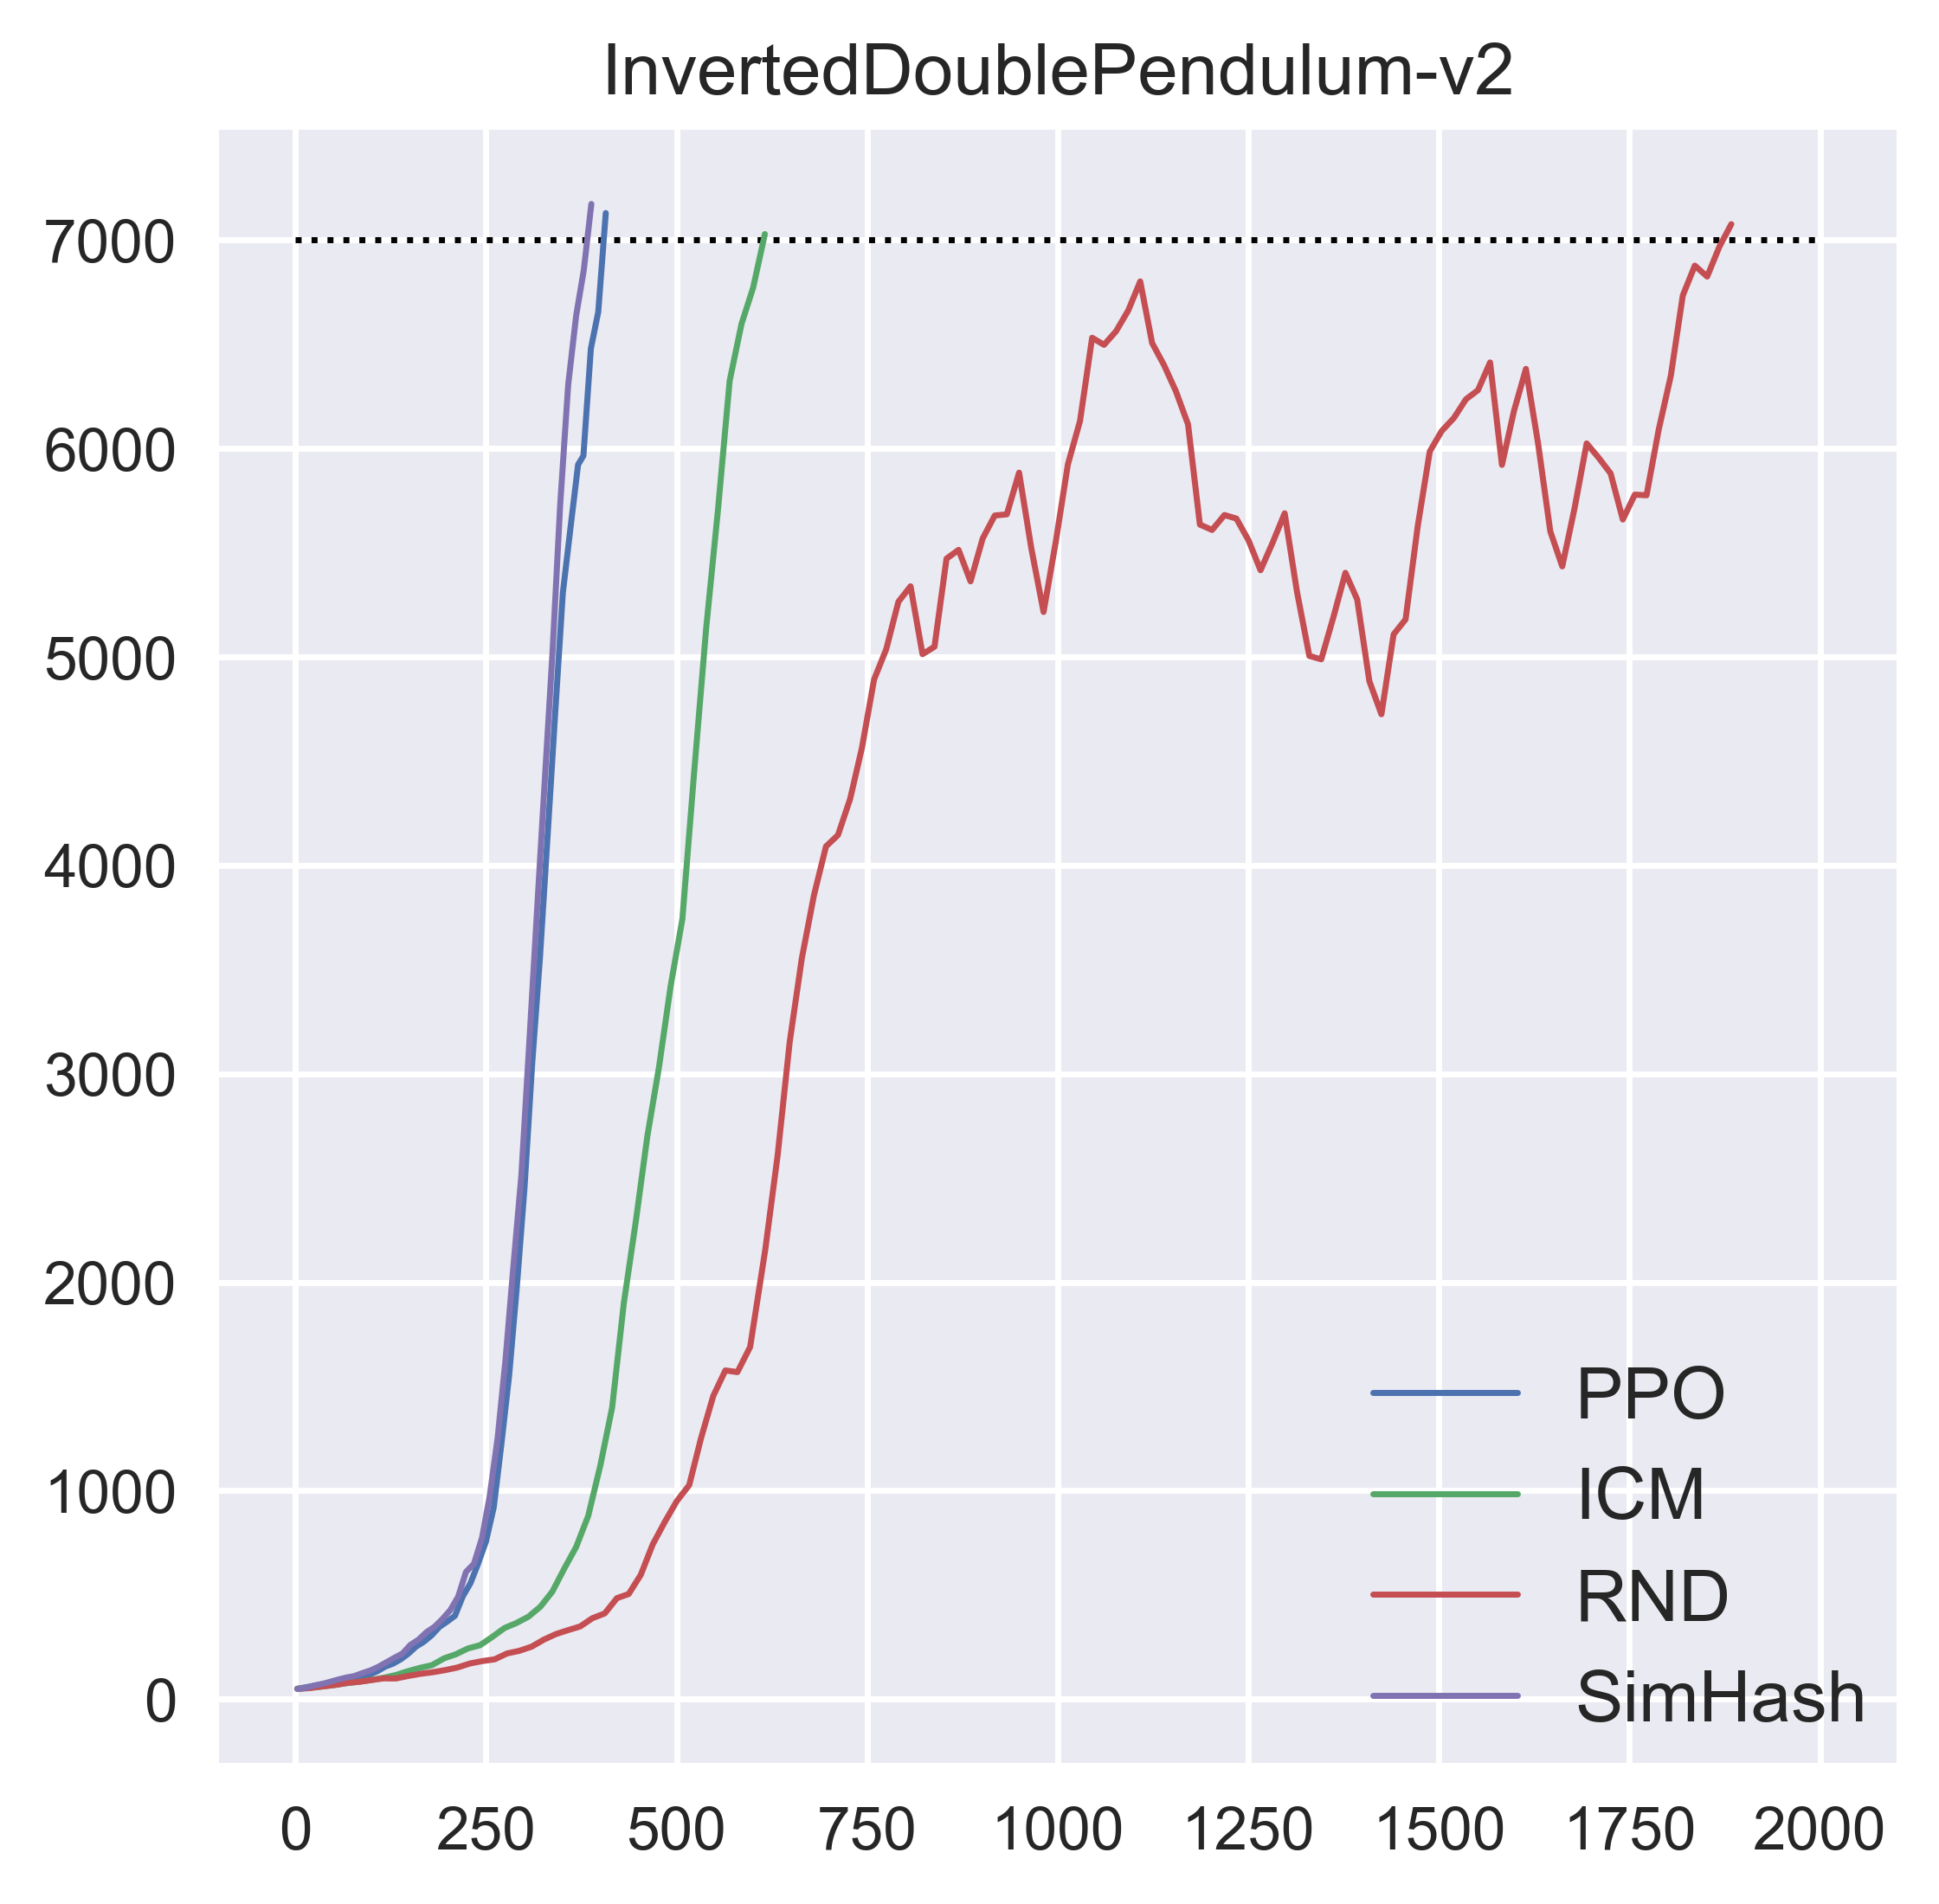

In [226]:
mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("InvertedDoublePendulum-v2")

mean_ppo = keep_below_target(mean_ppo, 7000)
mean_icm = keep_below_target(mean_icm, 7000)
mean_rnd = keep_below_target(mean_rnd, 7000)
mean_sh = keep_below_target(mean_sh, 7000)

plt.rcParams['figure.dpi']= 500
plt.style.use('seaborn')
plt.figure(figsize=(5,5))


plt.plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1)
plt.plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1)
plt.plot(mean_rnd["total_time"], mean_rnd["reward"], label = "RND", linewidth=1)
plt.plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1)
plt.legend(loc='lower right', borderaxespad=0., fontsize = "large")
plt.hlines(7000, 0, 2000, linestyles='dotted', linewidth=1)
plt.title("InvertedDoublePendulum-v2")
plt.savefig("InvertedDoublePendulum.eps", format='eps')

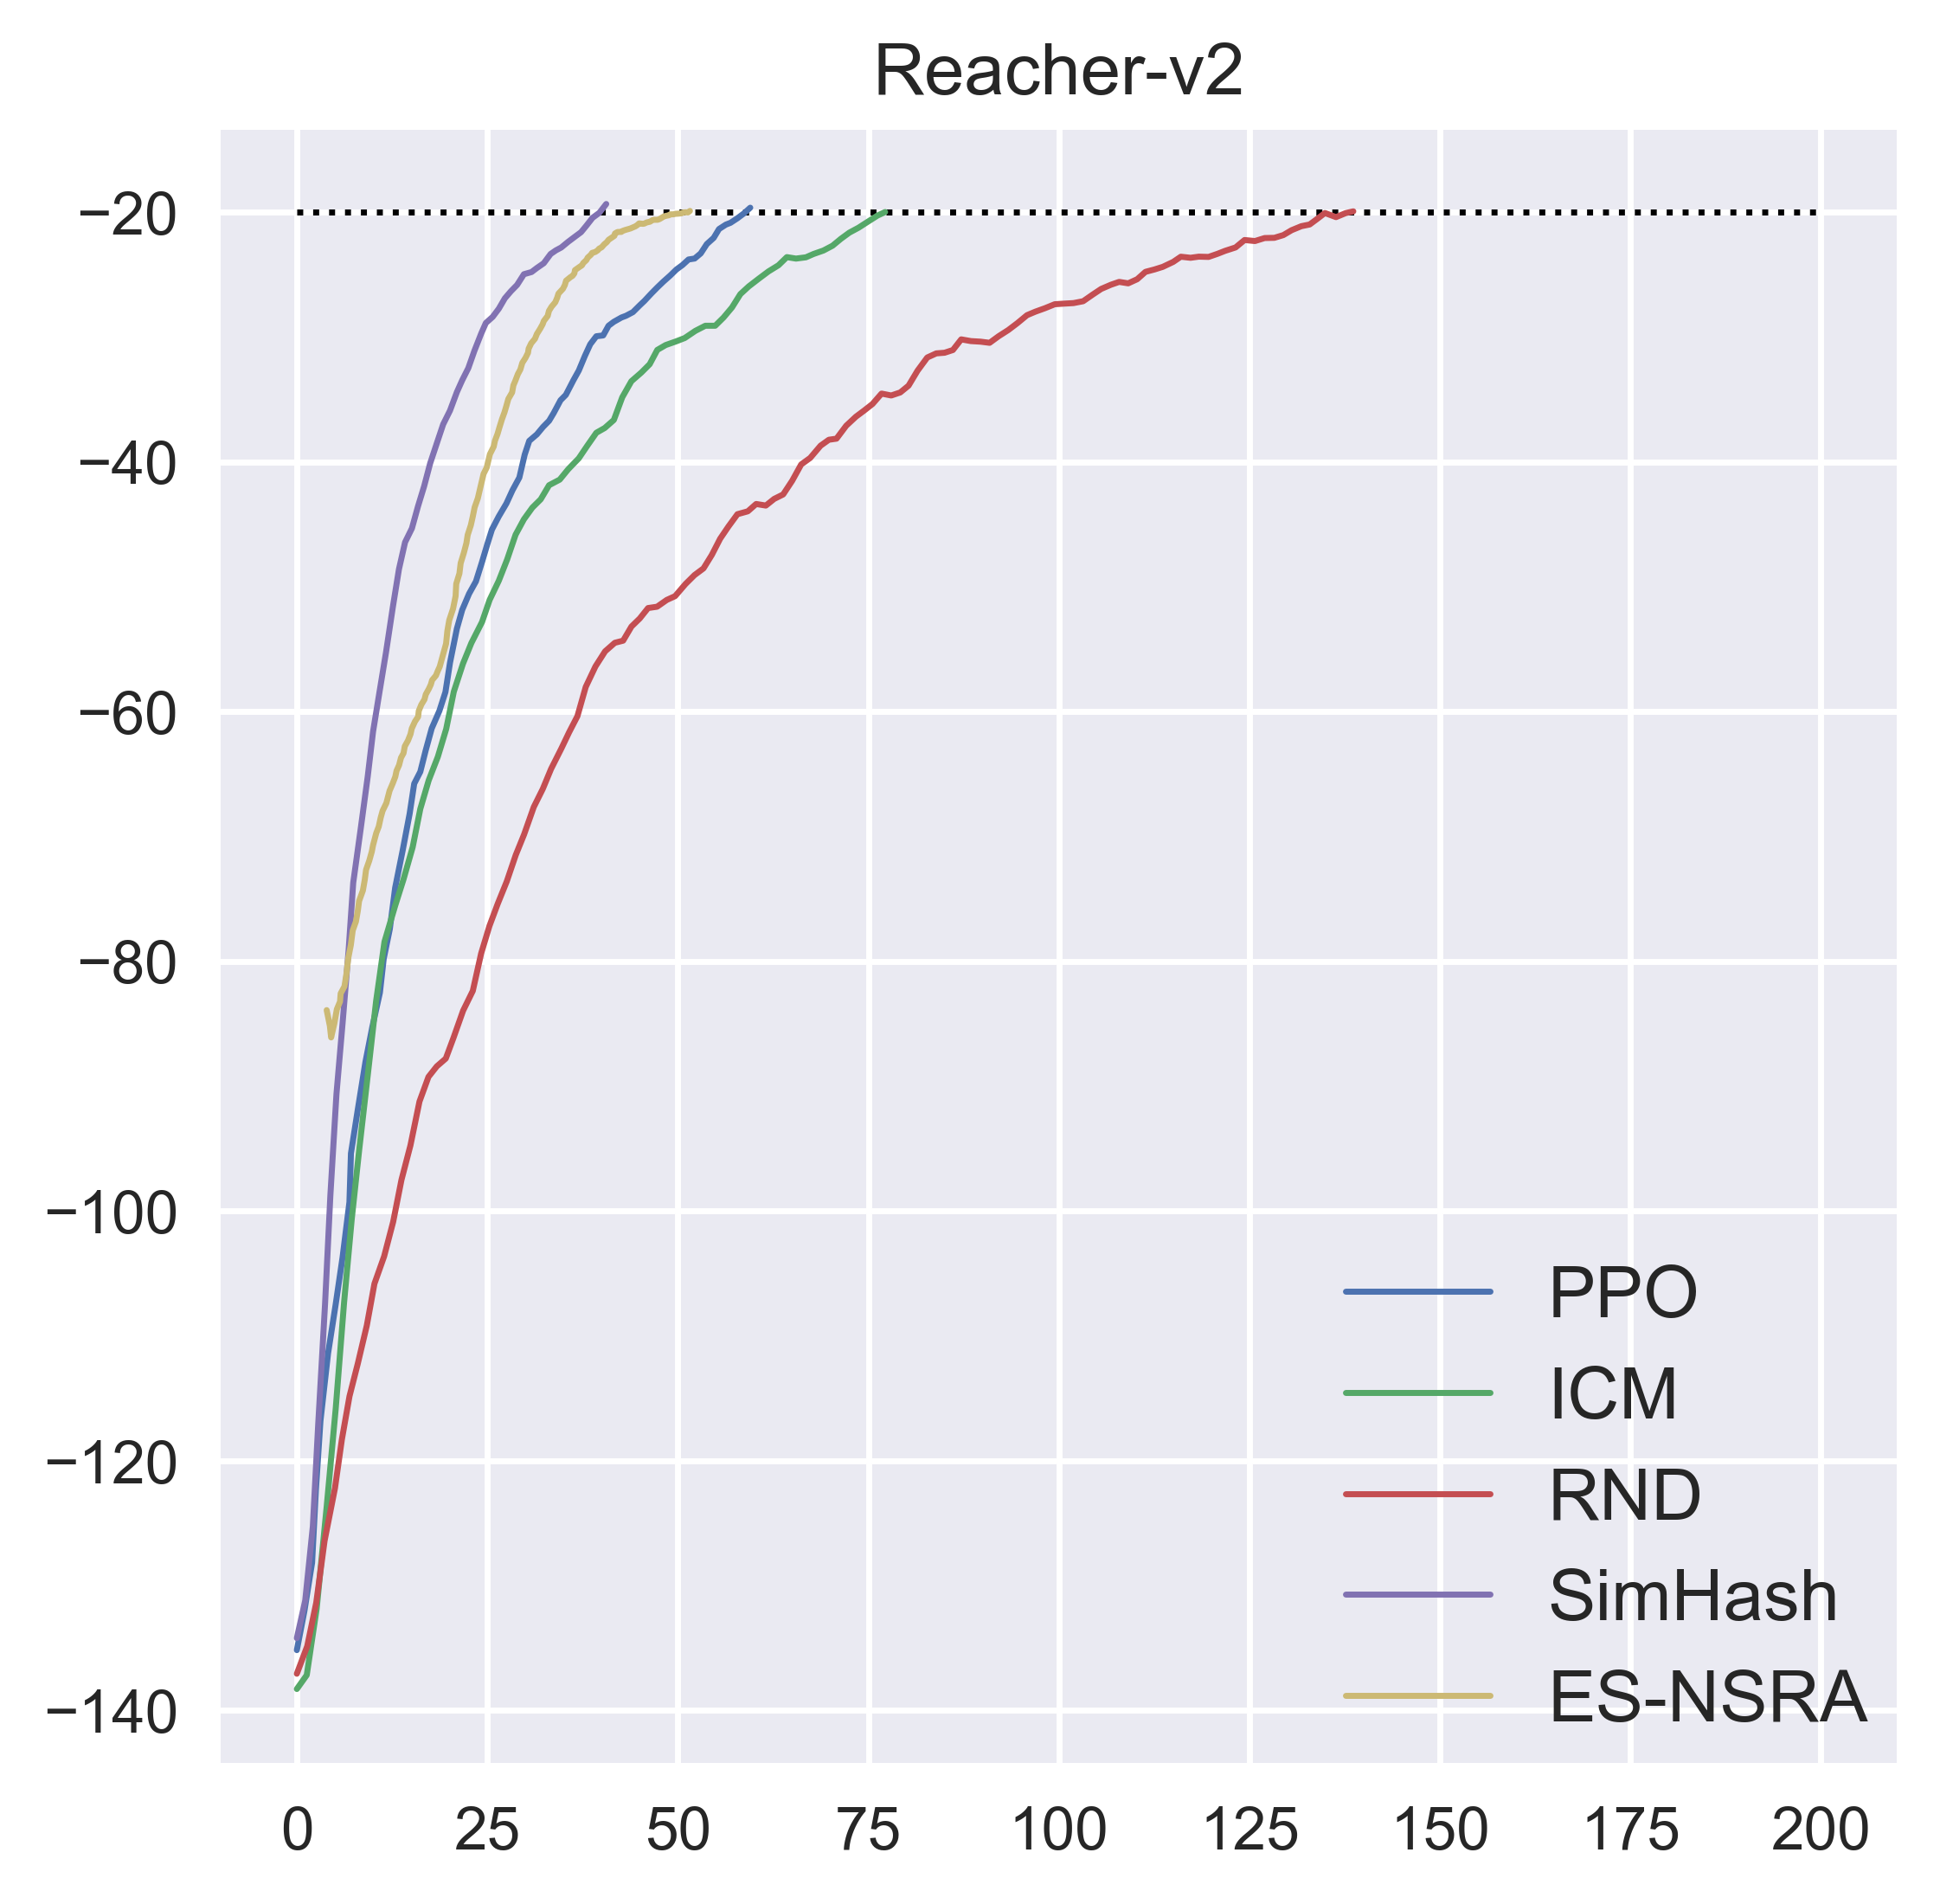

In [227]:
mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Reacher-v2")

mean_ppo = keep_below_target(mean_ppo, -20)
mean_icm = keep_below_target(mean_icm, -20)
mean_rnd = keep_below_target(mean_rnd, -20)
mean_sh = keep_below_target(mean_sh, -20)
mean_es = keep_below_target(mean_es, -20)

plt.rcParams['figure.dpi']= 500
plt.style.use('seaborn')
plt.figure(figsize=(5,5))


plt.plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1)
plt.plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1)
plt.plot(mean_rnd["total_time"], mean_rnd["reward"], label = "RND", linewidth=1)
plt.plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1)
plt.plot(mean_es["total_time"], mean_es["reward"], label = "ES-NSRA", linewidth=1)
plt.legend(loc='lower right', borderaxespad=0., fontsize = "large")
plt.hlines(-20, 0, 200, linestyles='dotted', linewidth=1)
plt.title("Reacher-v2")
plt.savefig("Reacher.eps", format='eps')

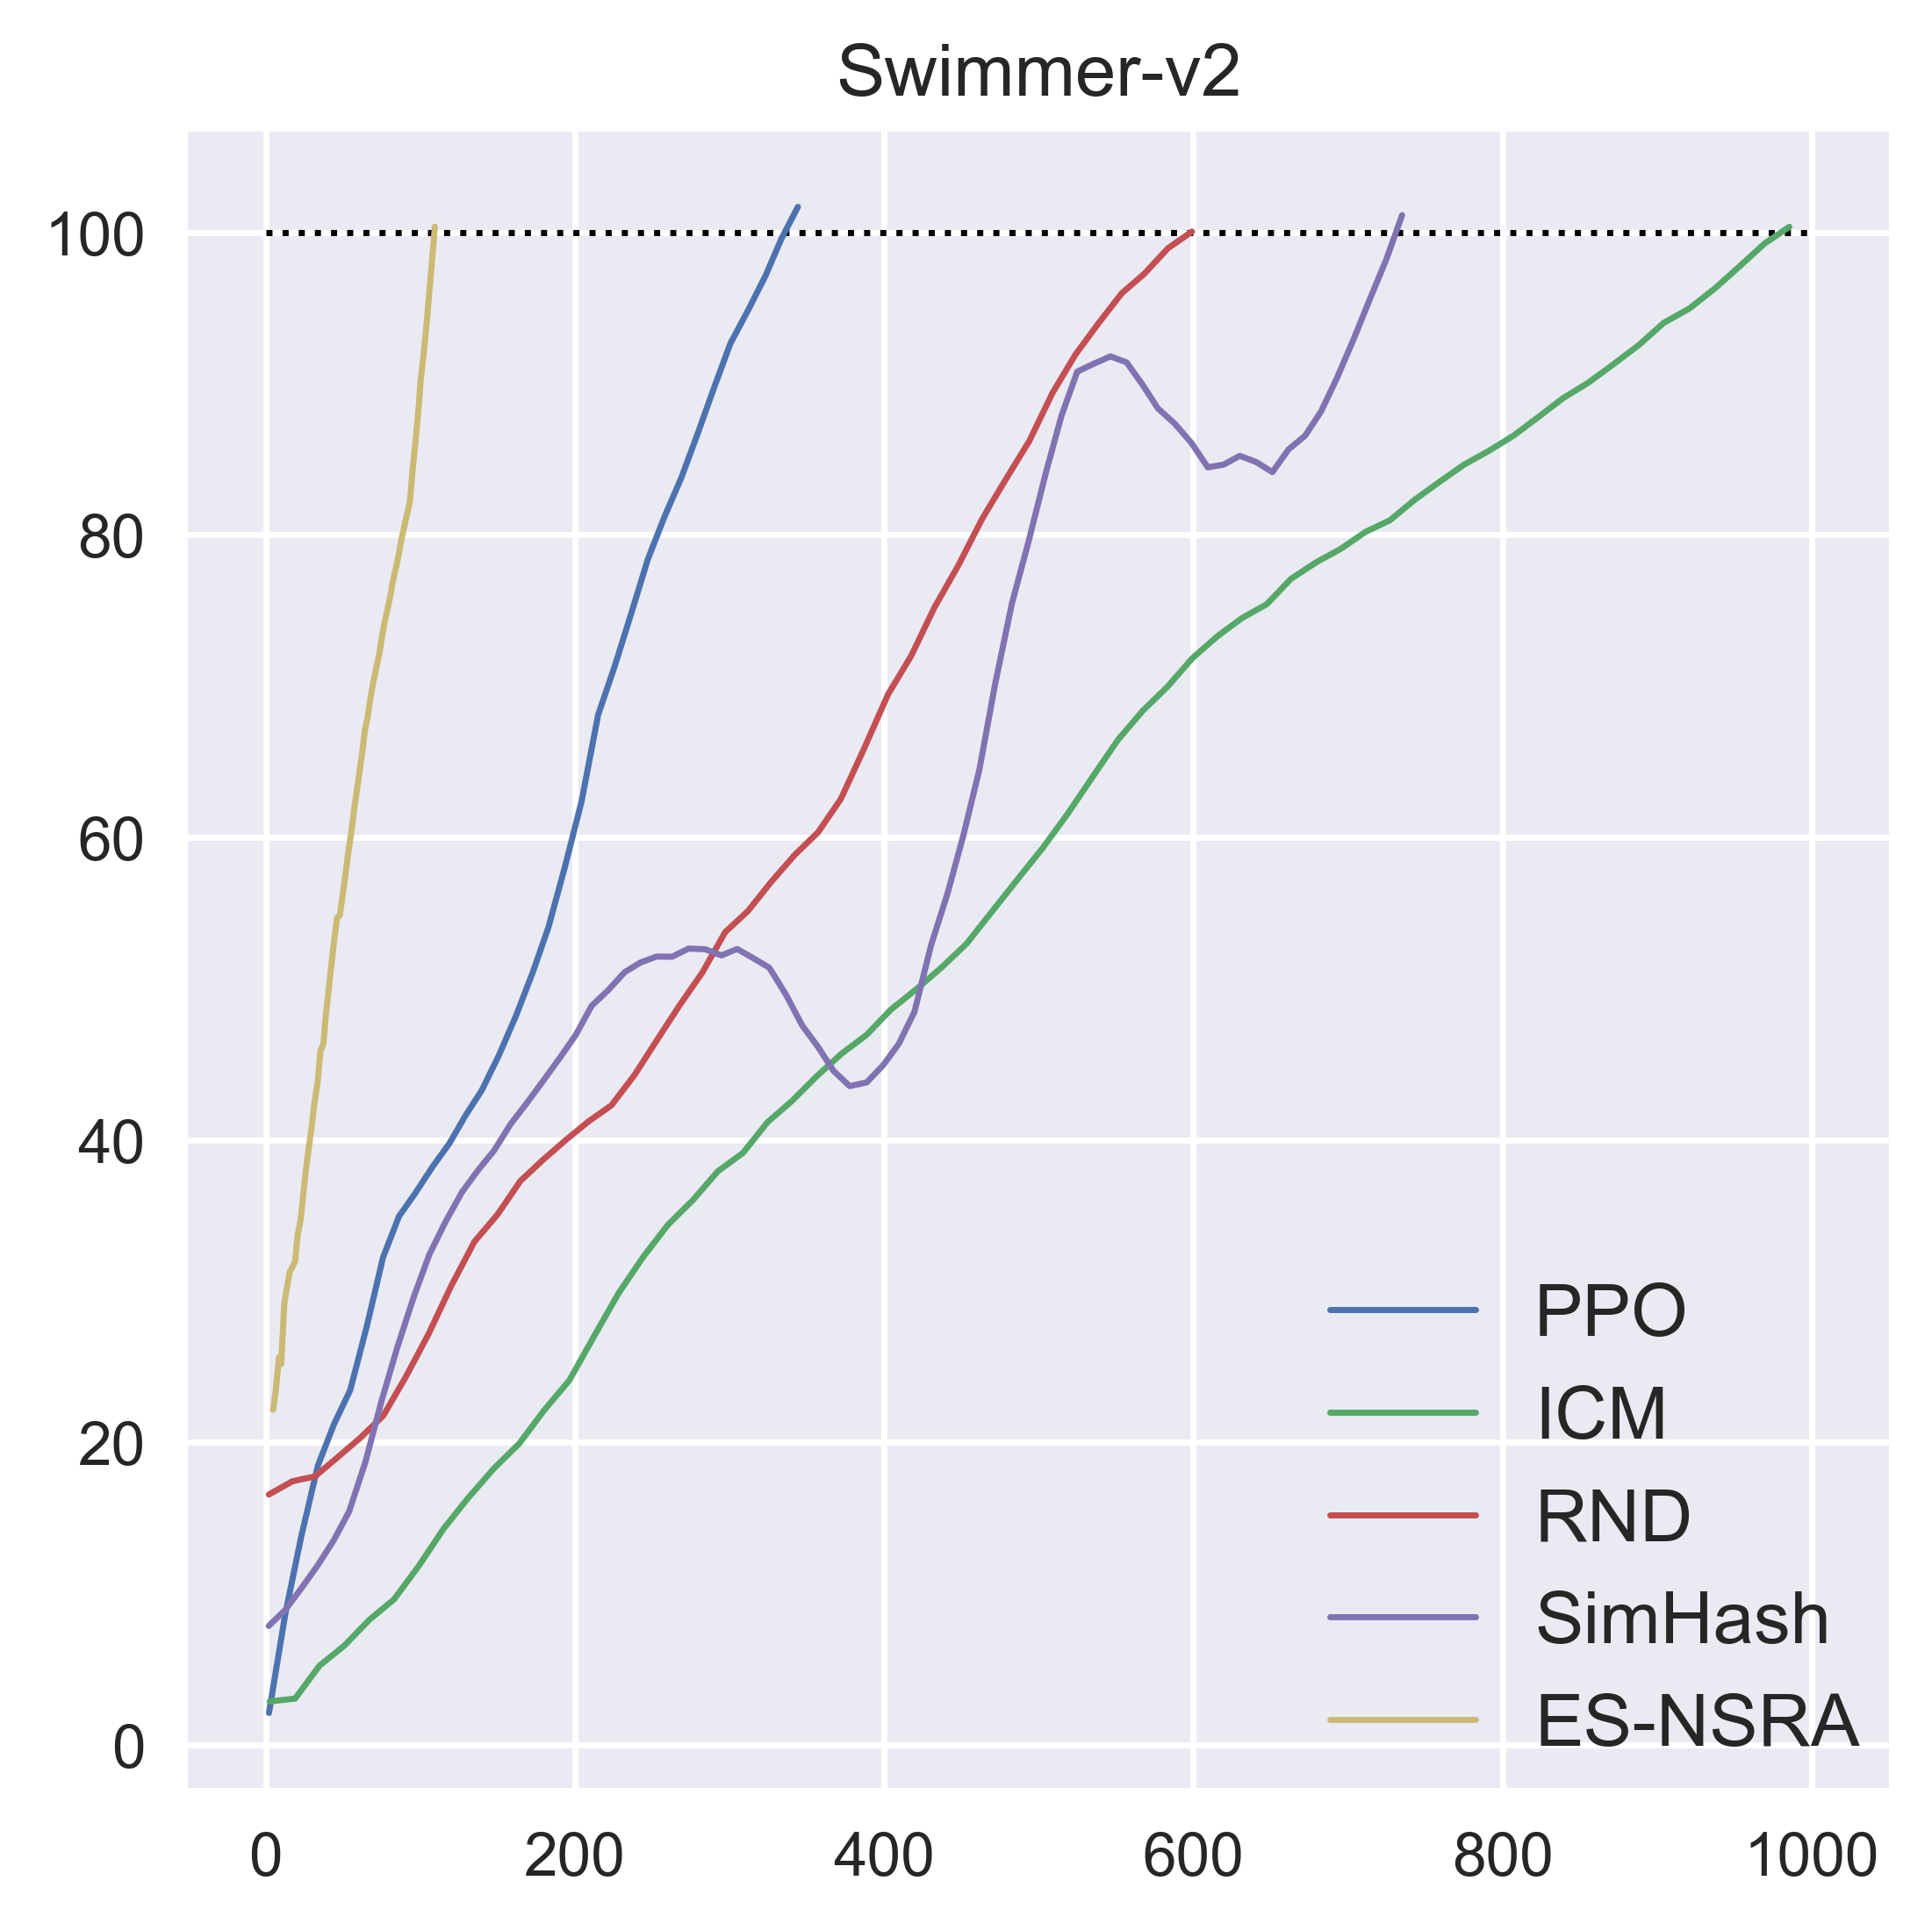

In [228]:
mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Swimmer-v2")

mean_ppo = keep_below_target(mean_ppo, 100)
mean_icm = keep_below_target(mean_icm, 100)
mean_rnd = keep_below_target(mean_rnd, 100)
mean_sh = keep_below_target(mean_sh, 100)
mean_es = keep_below_target(mean_es, 100)

plt.rcParams['figure.dpi']= 500
plt.style.use('seaborn')
plt.figure(figsize=(5,5))


plt.plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1)
plt.plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1)
plt.plot(mean_rnd["total_time"], mean_rnd["reward"], label = "RND", linewidth=1)
plt.plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1)
plt.plot(mean_es["total_time"], mean_es["reward"], label = "ES-NSRA", linewidth=1)
plt.legend(loc='lower right', borderaxespad=0., fontsize = "large")
plt.hlines(100, 0, 1000, linestyles='dotted', linewidth=1)
plt.title("Swimmer-v2")
plt.savefig("Swimmer.eps", format='eps')

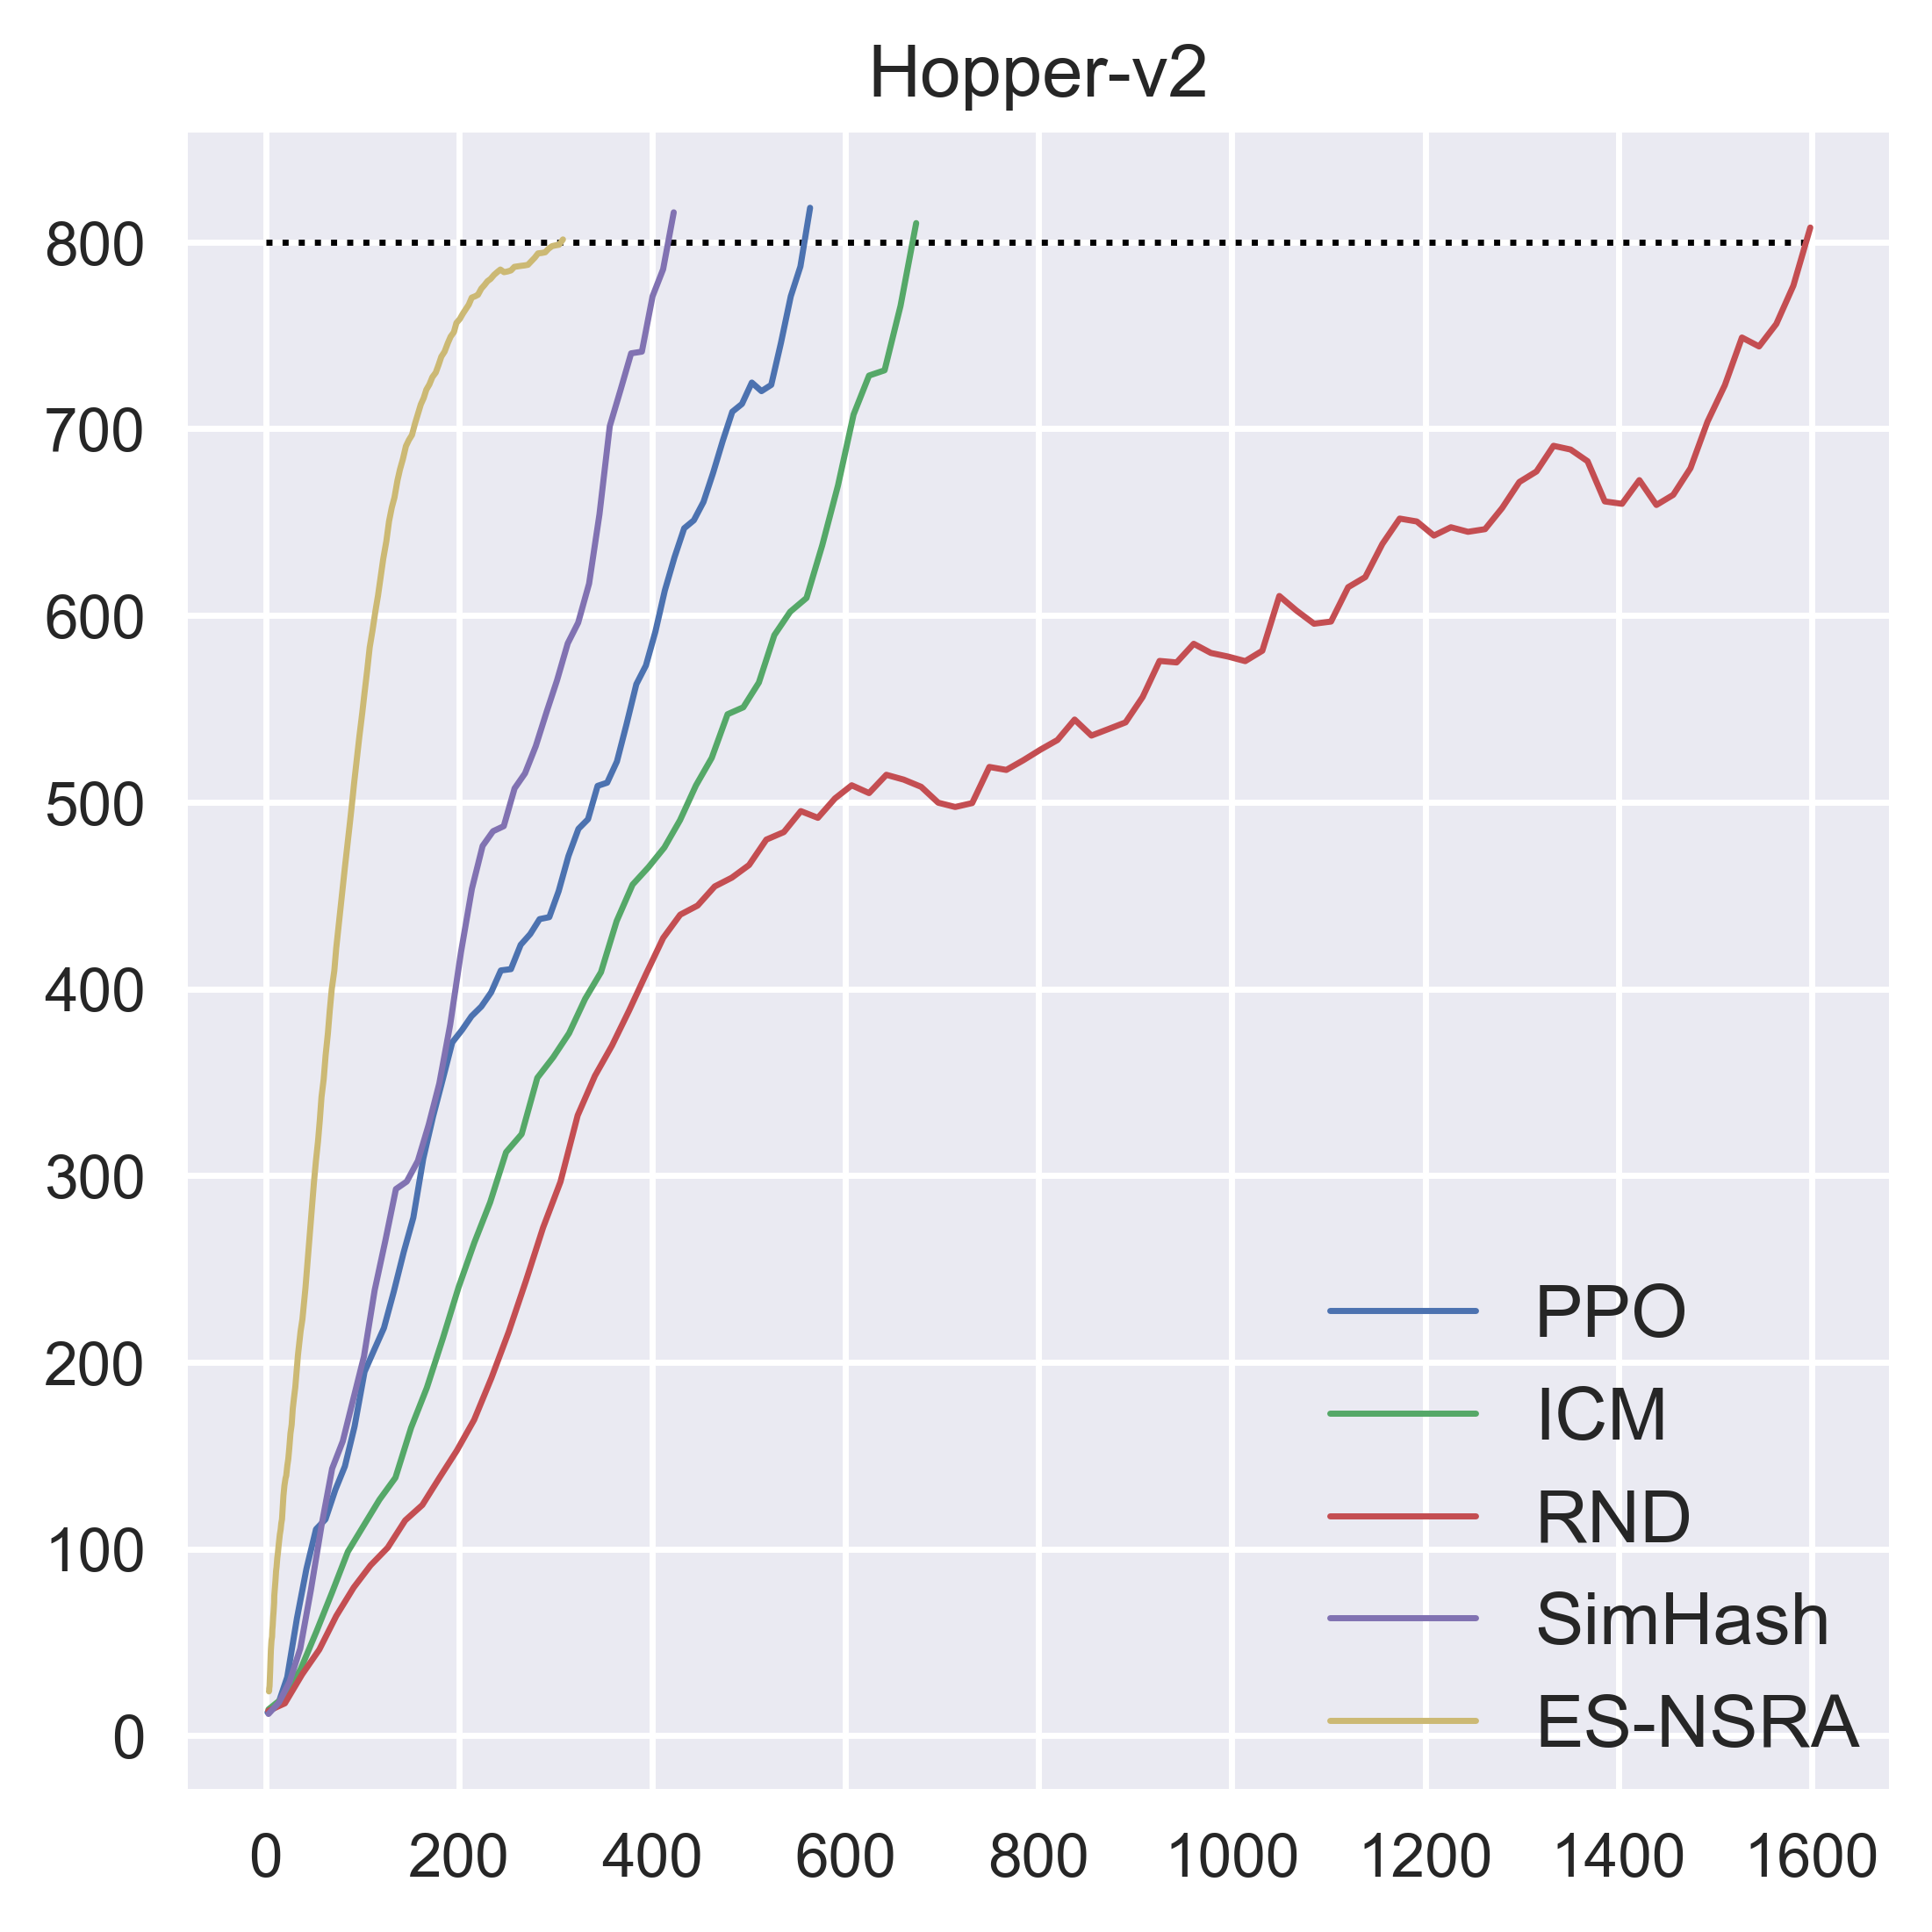

In [229]:
mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Hopper-v2")

mean_ppo = keep_below_target(mean_ppo, 800)
mean_icm = keep_below_target(mean_icm, 800)
mean_rnd = keep_below_target(mean_rnd, 800)
mean_sh = keep_below_target(mean_sh, 800)
mean_es = keep_below_target(mean_es, 800)

plt.rcParams['figure.dpi']= 500
plt.style.use('seaborn')
plt.figure(figsize=(5,5))


plt.plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1)
plt.plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1)
plt.plot(mean_rnd["total_time"], mean_rnd["reward"], label = "RND", linewidth=1)
plt.plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1)
plt.plot(mean_es["total_time"], mean_es["reward"], label = "ES-NSRA", linewidth=1)
plt.legend(loc='lower right', borderaxespad=0., fontsize = "large")
plt.hlines(800, 0, 1600, linestyles='dotted', linewidth=1)
plt.title("Hopper-v2")
plt.savefig("Hopper.eps", format='eps')

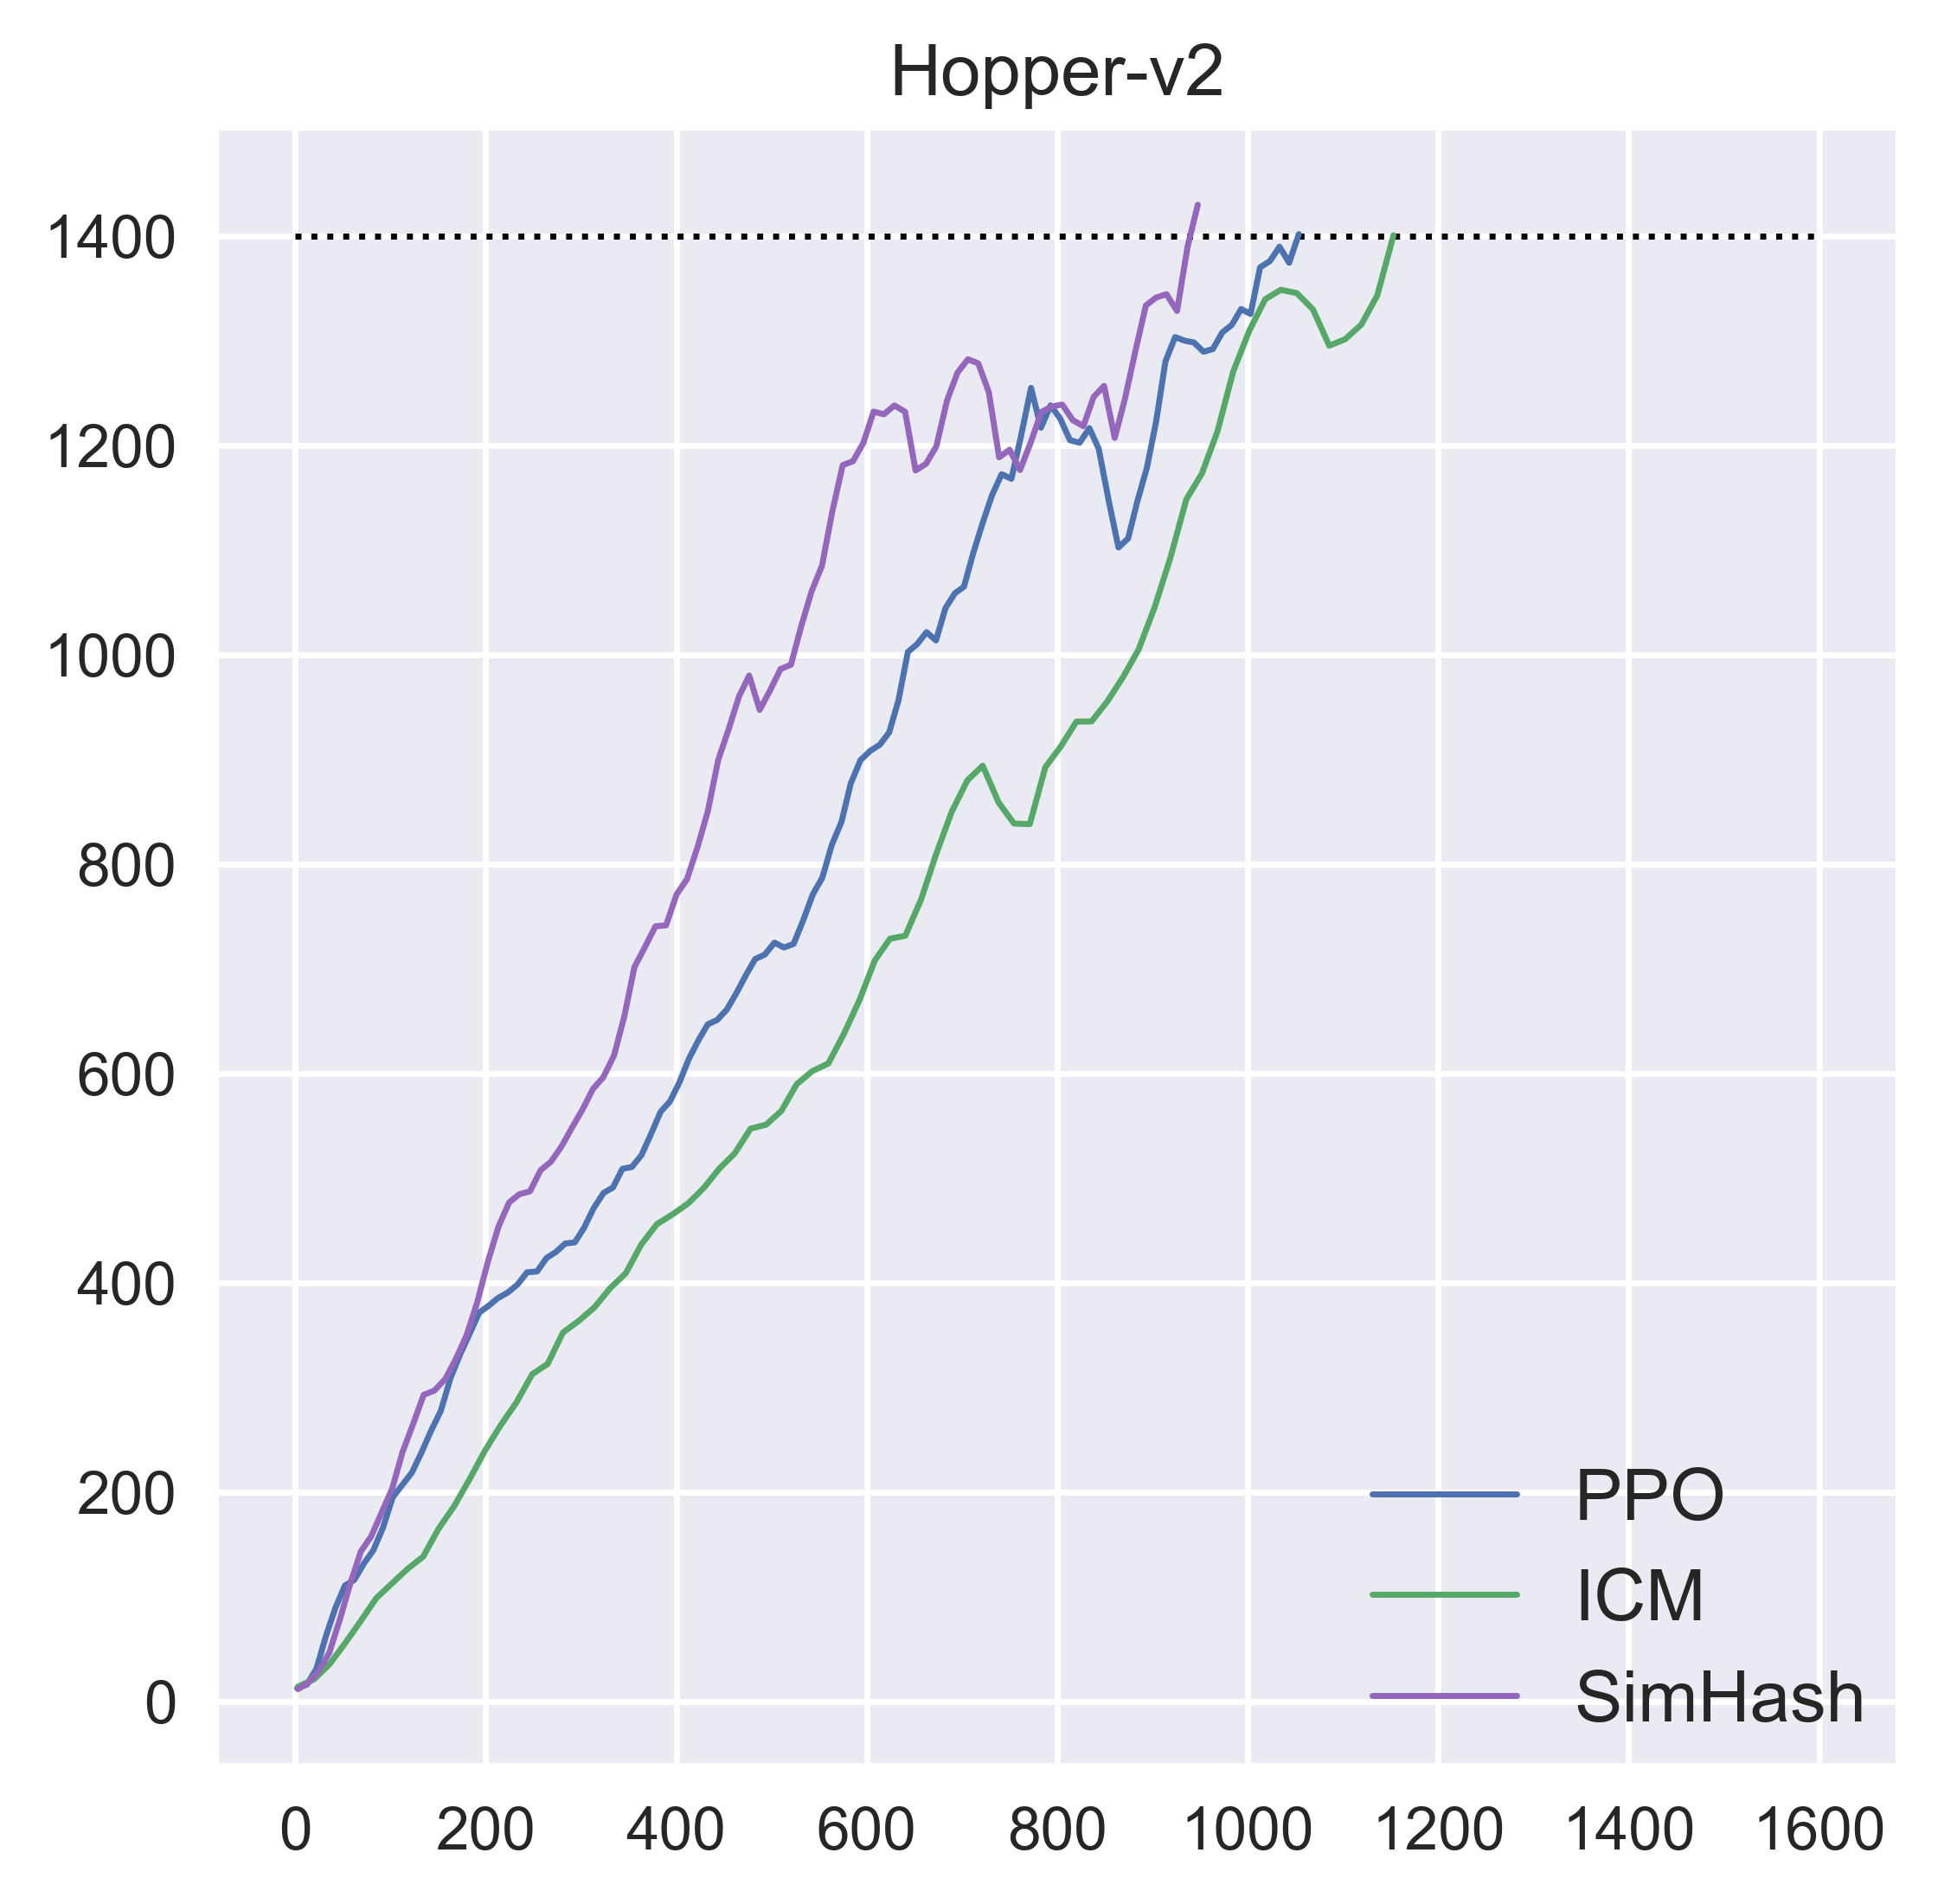

In [233]:
mean_ppo, mean_icm, mean_rnd, mean_sh, mean_es = average_all("Hopper-v2")

mean_ppo = keep_below_target(mean_ppo, 1400)
mean_icm = keep_below_target(mean_icm, 1400)
mean_sh = keep_below_target(mean_sh, 1400)

plt.rcParams['figure.dpi']= 500
plt.style.use('seaborn')
plt.figure(figsize=(5,5))


plt.plot(mean_ppo["total_time"], mean_ppo["reward"], label = "PPO", linewidth=1)
plt.plot(mean_icm["total_time"], mean_icm["reward"], label = "ICM", linewidth=1)
plt.plot(mean_sh["total_time"], mean_sh["reward"], label = "SimHash", linewidth=1, color = "#9467bd")
plt.legend(loc='lower right', borderaxespad=0., fontsize = "large")
plt.hlines(1400, 0, 1600, linestyles='dotted', linewidth=1)
plt.title("Hopper-v2")
plt.savefig("hopper-nornd.eps", format='eps')